In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [12]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize=1
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'],
                          chunksize=chunksize, iterator=True, encoding='utf-8',nrows=10000):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

1 rows
2 rows
3 rows
4 rows
5 rows
6 rows
7 rows
8 rows
9 rows
10 rows
11 rows
12 rows
13 rows
14 rows
15 rows
16 rows
17 rows
18 rows
19 rows
20 rows
21 rows
22 rows
23 rows
24 rows
25 rows
26 rows
27 rows
28 rows
29 rows
30 rows
31 rows
32 rows
33 rows
34 rows
35 rows
36 rows
37 rows
38 rows
39 rows
40 rows
41 rows
42 rows
43 rows
44 rows
45 rows
46 rows
47 rows
48 rows
49 rows
50 rows
51 rows
52 rows
53 rows
54 rows
55 rows
56 rows
57 rows
58 rows
59 rows
60 rows
61 rows
62 rows
63 rows
64 rows
65 rows
66 rows
67 rows
68 rows
69 rows
70 rows
71 rows
72 rows
73 rows
74 rows
75 rows
76 rows
77 rows
78 rows
79 rows
80 rows
81 rows
82 rows
83 rows
84 rows
85 rows
86 rows
87 rows
88 rows
89 rows
90 rows
91 rows
92 rows
93 rows
94 rows
95 rows
96 rows
97 rows
98 rows
99 rows
100 rows
101 rows
102 rows
103 rows
104 rows
105 rows
106 rows
107 rows
108 rows
109 rows
110 rows
111 rows
112 rows
113 rows
114 rows
115 rows
116 rows
117 rows
118 rows
119 rows
120 rows
121 rows
122 rows
123 rows
1

924 rows
925 rows
926 rows
927 rows
928 rows
929 rows
930 rows
931 rows
932 rows
933 rows
934 rows
935 rows
936 rows
937 rows
938 rows
939 rows
940 rows
941 rows
942 rows
943 rows
944 rows
945 rows
946 rows
947 rows
948 rows
949 rows
950 rows
951 rows
952 rows
953 rows
954 rows
955 rows
956 rows
957 rows
958 rows
959 rows
960 rows
961 rows
962 rows
963 rows
964 rows
965 rows
966 rows
967 rows
968 rows
969 rows
970 rows
971 rows
972 rows
973 rows
974 rows
975 rows
976 rows
977 rows
978 rows
979 rows
980 rows
981 rows
982 rows
983 rows
984 rows
985 rows
986 rows
987 rows
988 rows
989 rows
990 rows
991 rows
992 rows
993 rows
994 rows
995 rows
996 rows
997 rows
998 rows
999 rows
1000 rows
1001 rows
1002 rows
1003 rows
1004 rows
1005 rows
1006 rows
1007 rows
1008 rows
1009 rows
1010 rows
1011 rows
1012 rows
1013 rows
1014 rows
1015 rows
1016 rows
1017 rows
1018 rows
1019 rows
1020 rows
1021 rows
1022 rows
1023 rows
1024 rows
1025 rows
1026 rows
1027 rows
1028 rows
1029 rows
1030 rows
1031 r

1753 rows
1754 rows
1755 rows
1756 rows
1757 rows
1758 rows
1759 rows
1760 rows
1761 rows
1762 rows
1763 rows
1764 rows
1765 rows
1766 rows
1767 rows
1768 rows
1769 rows
1770 rows
1771 rows
1772 rows
1773 rows
1774 rows
1775 rows
1776 rows
1777 rows
1778 rows
1779 rows
1780 rows
1781 rows
1782 rows
1783 rows
1784 rows
1785 rows
1786 rows
1787 rows
1788 rows
1789 rows
1790 rows
1791 rows
1792 rows
1793 rows
1794 rows
1795 rows
1796 rows
1797 rows
1798 rows
1799 rows
1800 rows
1801 rows
1802 rows
1803 rows
1804 rows
1805 rows
1806 rows
1807 rows
1808 rows
1809 rows
1810 rows
1811 rows
1812 rows
1813 rows
1814 rows
1815 rows
1816 rows
1817 rows
1818 rows
1819 rows
1820 rows
1821 rows
1822 rows
1823 rows
1824 rows
1825 rows
1826 rows
1827 rows
1828 rows
1829 rows
1830 rows
1831 rows
1832 rows
1833 rows
1834 rows
1835 rows
1836 rows
1837 rows
1838 rows
1839 rows
1840 rows
1841 rows
1842 rows
1843 rows
1844 rows
1845 rows
1846 rows
1847 rows
1848 rows
1849 rows
1850 rows
1851 rows
1852 rows


2575 rows
2576 rows
2577 rows
2578 rows
2579 rows
2580 rows
2581 rows
2582 rows
2583 rows
2584 rows
2585 rows
2586 rows
2587 rows
2588 rows
2589 rows
2590 rows
2591 rows
2592 rows
2593 rows
2594 rows
2595 rows
2596 rows
2597 rows
2598 rows
2599 rows
2600 rows
2601 rows
2602 rows
2603 rows
2604 rows
2605 rows
2606 rows
2607 rows
2608 rows
2609 rows
2610 rows
2611 rows
2612 rows
2613 rows
2614 rows
2615 rows
2616 rows
2617 rows
2618 rows
2619 rows
2620 rows
2621 rows
2622 rows
2623 rows
2624 rows
2625 rows
2626 rows
2627 rows
2628 rows
2629 rows
2630 rows
2631 rows
2632 rows
2633 rows
2634 rows
2635 rows
2636 rows
2637 rows
2638 rows
2639 rows
2640 rows
2641 rows
2642 rows
2643 rows
2644 rows
2645 rows
2646 rows
2647 rows
2648 rows
2649 rows
2650 rows
2651 rows
2652 rows
2653 rows
2654 rows
2655 rows
2656 rows
2657 rows
2658 rows
2659 rows
2660 rows
2661 rows
2662 rows
2663 rows
2664 rows
2665 rows
2666 rows
2667 rows
2668 rows
2669 rows
2670 rows
2671 rows
2672 rows
2673 rows
2674 rows


3396 rows
3397 rows
3398 rows
3399 rows
3400 rows
3401 rows
3402 rows
3403 rows
3404 rows
3405 rows
3406 rows
3407 rows
3408 rows
3409 rows
3410 rows
3411 rows
3412 rows
3413 rows
3414 rows
3415 rows
3416 rows
3417 rows
3418 rows
3419 rows
3420 rows
3421 rows
3422 rows
3423 rows
3424 rows
3425 rows
3426 rows
3427 rows
3428 rows
3429 rows
3430 rows
3431 rows
3432 rows
3433 rows
3434 rows
3435 rows
3436 rows
3437 rows
3438 rows
3439 rows
3440 rows
3441 rows
3442 rows
3443 rows
3444 rows
3445 rows
3446 rows
3447 rows
3448 rows
3449 rows
3450 rows
3451 rows
3452 rows
3453 rows
3454 rows
3455 rows
3456 rows
3457 rows
3458 rows
3459 rows
3460 rows
3461 rows
3462 rows
3463 rows
3464 rows
3465 rows
3466 rows
3467 rows
3468 rows
3469 rows
3470 rows
3471 rows
3472 rows
3473 rows
3474 rows
3475 rows
3476 rows
3477 rows
3478 rows
3479 rows
3480 rows
3481 rows
3482 rows
3483 rows
3484 rows
3485 rows
3486 rows
3487 rows
3488 rows
3489 rows
3490 rows
3491 rows
3492 rows
3493 rows
3494 rows
3495 rows


4218 rows
4219 rows
4220 rows
4221 rows
4222 rows
4223 rows
4224 rows
4225 rows
4226 rows
4227 rows
4228 rows
4229 rows
4230 rows
4231 rows
4232 rows
4233 rows
4234 rows
4235 rows
4236 rows
4237 rows
4238 rows
4239 rows
4240 rows
4241 rows
4242 rows
4243 rows
4244 rows
4245 rows
4246 rows
4247 rows
4248 rows
4249 rows
4250 rows
4251 rows
4252 rows
4253 rows
4254 rows
4255 rows
4256 rows
4257 rows
4258 rows
4259 rows
4260 rows
4261 rows
4262 rows
4263 rows
4264 rows
4265 rows
4266 rows
4267 rows
4268 rows
4269 rows
4270 rows
4271 rows
4272 rows
4273 rows
4274 rows
4275 rows
4276 rows
4277 rows
4278 rows
4279 rows
4280 rows
4281 rows
4282 rows
4283 rows
4284 rows
4285 rows
4286 rows
4287 rows
4288 rows
4289 rows
4290 rows
4291 rows
4292 rows
4293 rows
4294 rows
4295 rows
4296 rows
4297 rows
4298 rows
4299 rows
4300 rows
4301 rows
4302 rows
4303 rows
4304 rows
4305 rows
4306 rows
4307 rows
4308 rows
4309 rows
4310 rows
4311 rows
4312 rows
4313 rows
4314 rows
4315 rows
4316 rows
4317 rows


5039 rows
5040 rows
5041 rows
5042 rows
5043 rows
5044 rows
5045 rows
5046 rows
5047 rows
5048 rows
5049 rows
5050 rows
5051 rows
5052 rows
5053 rows
5054 rows
5055 rows
5056 rows
5057 rows
5058 rows
5059 rows
5060 rows
5061 rows
5062 rows
5063 rows
5064 rows
5065 rows
5066 rows
5067 rows
5068 rows
5069 rows
5070 rows
5071 rows
5072 rows
5073 rows
5074 rows
5075 rows
5076 rows
5077 rows
5078 rows
5079 rows
5080 rows
5081 rows
5082 rows
5083 rows
5084 rows
5085 rows
5086 rows
5087 rows
5088 rows
5089 rows
5090 rows
5091 rows
5092 rows
5093 rows
5094 rows
5095 rows
5096 rows
5097 rows
5098 rows
5099 rows
5100 rows
5101 rows
5102 rows
5103 rows
5104 rows
5105 rows
5106 rows
5107 rows
5108 rows
5109 rows
5110 rows
5111 rows
5112 rows
5113 rows
5114 rows
5115 rows
5116 rows
5117 rows
5118 rows
5119 rows
5120 rows
5121 rows
5122 rows
5123 rows
5124 rows
5125 rows
5126 rows
5127 rows
5128 rows
5129 rows
5130 rows
5131 rows
5132 rows
5133 rows
5134 rows
5135 rows
5136 rows
5137 rows
5138 rows


5860 rows
5861 rows
5862 rows
5863 rows
5864 rows
5865 rows
5866 rows
5867 rows
5868 rows
5869 rows
5870 rows
5871 rows
5872 rows
5873 rows
5874 rows
5875 rows
5876 rows
5877 rows
5878 rows
5879 rows
5880 rows
5881 rows
5882 rows
5883 rows
5884 rows
5885 rows
5886 rows
5887 rows
5888 rows
5889 rows
5890 rows
5891 rows
5892 rows
5893 rows
5894 rows
5895 rows
5896 rows
5897 rows
5898 rows
5899 rows
5900 rows
5901 rows
5902 rows
5903 rows
5904 rows
5905 rows
5906 rows
5907 rows
5908 rows
5909 rows
5910 rows
5911 rows
5912 rows
5913 rows
5914 rows
5915 rows
5916 rows
5917 rows
5918 rows
5919 rows
5920 rows
5921 rows
5922 rows
5923 rows
5924 rows
5925 rows
5926 rows
5927 rows
5928 rows
5929 rows
5930 rows
5931 rows
5932 rows
5933 rows
5934 rows
5935 rows
5936 rows
5937 rows
5938 rows
5939 rows
5940 rows
5941 rows
5942 rows
5943 rows
5944 rows
5945 rows
5946 rows
5947 rows
5948 rows
5949 rows
5950 rows
5951 rows
5952 rows
5953 rows
5954 rows
5955 rows
5956 rows
5957 rows
5958 rows
5959 rows


6680 rows
6681 rows
6682 rows
6683 rows
6684 rows
6685 rows
6686 rows
6687 rows
6688 rows
6689 rows
6690 rows
6691 rows
6692 rows
6693 rows
6694 rows
6695 rows
6696 rows
6697 rows
6698 rows
6699 rows
6700 rows
6701 rows
6702 rows
6703 rows
6704 rows
6705 rows
6706 rows
6707 rows
6708 rows
6709 rows
6710 rows
6711 rows
6712 rows
6713 rows
6714 rows
6715 rows
6716 rows
6717 rows
6718 rows
6719 rows
6720 rows
6721 rows
6722 rows
6723 rows
6724 rows
6725 rows
6726 rows
6727 rows
6728 rows
6729 rows
6730 rows
6731 rows
6732 rows
6733 rows
6734 rows
6735 rows
6736 rows
6737 rows
6738 rows
6739 rows
6740 rows
6741 rows
6742 rows
6743 rows
6744 rows
6745 rows
6746 rows
6747 rows
6748 rows
6749 rows
6750 rows
6751 rows
6752 rows
6753 rows
6754 rows
6755 rows
6756 rows
6757 rows
6758 rows
6759 rows
6760 rows
6761 rows
6762 rows
6763 rows
6764 rows
6765 rows
6766 rows
6767 rows
6768 rows
6769 rows
6770 rows
6771 rows
6772 rows
6773 rows
6774 rows
6775 rows
6776 rows
6777 rows
6778 rows
6779 rows


7500 rows
7501 rows
7502 rows
7503 rows
7504 rows
7505 rows
7506 rows
7507 rows
7508 rows
7509 rows
7510 rows
7511 rows
7512 rows
7513 rows
7514 rows
7515 rows
7516 rows
7517 rows
7518 rows
7519 rows
7520 rows
7521 rows
7522 rows
7523 rows
7524 rows
7525 rows
7526 rows
7527 rows
7528 rows
7529 rows
7530 rows
7531 rows
7532 rows
7533 rows
7534 rows
7535 rows
7536 rows
7537 rows
7538 rows
7539 rows
7540 rows
7541 rows
7542 rows
7543 rows
7544 rows
7545 rows
7546 rows
7547 rows
7548 rows
7549 rows
7550 rows
7551 rows
7552 rows
7553 rows
7554 rows
7555 rows
7556 rows
7557 rows
7558 rows
7559 rows
7560 rows
7561 rows
7562 rows
7563 rows
7564 rows
7565 rows
7566 rows
7567 rows
7568 rows
7569 rows
7570 rows
7571 rows
7572 rows
7573 rows
7574 rows
7575 rows
7576 rows
7577 rows
7578 rows
7579 rows
7580 rows
7581 rows
7582 rows
7583 rows
7584 rows
7585 rows
7586 rows
7587 rows
7588 rows
7589 rows
7590 rows
7591 rows
7592 rows
7593 rows
7594 rows
7595 rows
7596 rows
7597 rows
7598 rows
7599 rows


8322 rows
8323 rows
8324 rows
8325 rows
8326 rows
8327 rows
8328 rows
8329 rows
8330 rows
8331 rows
8332 rows
8333 rows
8334 rows
8335 rows
8336 rows
8337 rows
8338 rows
8339 rows
8340 rows
8341 rows
8342 rows
8343 rows
8344 rows
8345 rows
8346 rows
8347 rows
8348 rows
8349 rows
8350 rows
8351 rows
8352 rows
8353 rows
8354 rows
8355 rows
8356 rows
8357 rows
8358 rows
8359 rows
8360 rows
8361 rows
8362 rows
8363 rows
8364 rows
8365 rows
8366 rows
8367 rows
8368 rows
8369 rows
8370 rows
8371 rows
8372 rows
8373 rows
8374 rows
8375 rows
8376 rows
8377 rows
8378 rows
8379 rows
8380 rows
8381 rows
8382 rows
8383 rows
8384 rows
8385 rows
8386 rows
8387 rows
8388 rows
8389 rows
8390 rows
8391 rows
8392 rows
8393 rows
8394 rows
8395 rows
8396 rows
8397 rows
8398 rows
8399 rows
8400 rows
8401 rows
8402 rows
8403 rows
8404 rows
8405 rows
8406 rows
8407 rows
8408 rows
8409 rows
8410 rows
8411 rows
8412 rows
8413 rows
8414 rows
8415 rows
8416 rows
8417 rows
8418 rows
8419 rows
8420 rows
8421 rows


9144 rows
9145 rows
9146 rows
9147 rows
9148 rows
9149 rows
9150 rows
9151 rows
9152 rows
9153 rows
9154 rows
9155 rows
9156 rows
9157 rows
9158 rows
9159 rows
9160 rows
9161 rows
9162 rows
9163 rows
9164 rows
9165 rows
9166 rows
9167 rows
9168 rows
9169 rows
9170 rows
9171 rows
9172 rows
9173 rows
9174 rows
9175 rows
9176 rows
9177 rows
9178 rows
9179 rows
9180 rows
9181 rows
9182 rows
9183 rows
9184 rows
9185 rows
9186 rows
9187 rows
9188 rows
9189 rows
9190 rows
9191 rows
9192 rows
9193 rows
9194 rows
9195 rows
9196 rows
9197 rows
9198 rows
9199 rows
9200 rows
9201 rows
9202 rows
9203 rows
9204 rows
9205 rows
9206 rows
9207 rows
9208 rows
9209 rows
9210 rows
9211 rows
9212 rows
9213 rows
9214 rows
9215 rows
9216 rows
9217 rows
9218 rows
9219 rows
9220 rows
9221 rows
9222 rows
9223 rows
9224 rows
9225 rows
9226 rows
9227 rows
9228 rows
9229 rows
9230 rows
9231 rows
9232 rows
9233 rows
9234 rows
9235 rows
9236 rows
9237 rows
9238 rows
9239 rows
9240 rows
9241 rows
9242 rows
9243 rows


9966 rows
9967 rows
9968 rows
9969 rows
9970 rows
9971 rows
9972 rows
9973 rows
9974 rows
9975 rows
9976 rows
9977 rows
9978 rows
9979 rows
9980 rows
9981 rows
9982 rows
9983 rows
9984 rows
9985 rows
9986 rows
9987 rows
9988 rows
9989 rows
9990 rows
9991 rows
9992 rows
9993 rows
9994 rows
9995 rows
9996 rows
9997 rows
9998 rows
9999 rows
10000 rows
10001 rows
10002 rows
10003 rows
10004 rows
10005 rows
10006 rows
10007 rows
10008 rows
10009 rows
10010 rows
10011 rows
10012 rows
10013 rows
10014 rows
10015 rows
10016 rows
10017 rows
10018 rows
10019 rows
10020 rows
10021 rows
10022 rows
10023 rows
10024 rows
10025 rows
10026 rows
10027 rows
10028 rows
10029 rows
10030 rows
10031 rows
10032 rows
10033 rows
10034 rows
10035 rows
10036 rows
10037 rows
10038 rows
10039 rows
10040 rows
10041 rows
10042 rows
10043 rows
10044 rows
10045 rows
10046 rows
10047 rows
10048 rows
10049 rows
10050 rows
10051 rows
10052 rows
10053 rows
10054 rows
10055 rows
10056 rows
10057 rows
10058 rows
10059 rows


10714 rows
10715 rows
10716 rows
10717 rows
10718 rows
10719 rows
10720 rows
10721 rows
10722 rows
10723 rows
10724 rows
10725 rows
10726 rows
10727 rows
10728 rows
10729 rows
10730 rows
10731 rows
10732 rows
10733 rows
10734 rows
10735 rows
10736 rows
10737 rows
10738 rows
10739 rows
10740 rows
10741 rows
10742 rows
10743 rows
10744 rows
10745 rows
10746 rows
10747 rows
10748 rows
10749 rows
10750 rows
10751 rows
10752 rows
10753 rows
10754 rows
10755 rows
10756 rows
10757 rows
10758 rows
10759 rows
10760 rows
10761 rows
10762 rows
10763 rows
10764 rows
10765 rows
10766 rows
10767 rows
10768 rows
10769 rows
10770 rows
10771 rows
10772 rows
10773 rows
10774 rows
10775 rows
10776 rows
10777 rows
10778 rows
10779 rows
10780 rows
10781 rows
10782 rows
10783 rows
10784 rows
10785 rows
10786 rows
10787 rows
10788 rows
10789 rows
10790 rows
10791 rows
10792 rows
10793 rows
10794 rows
10795 rows
10796 rows
10797 rows
10798 rows
10799 rows
10800 rows
10801 rows
10802 rows
10803 rows
10804 rows

11460 rows
11461 rows
11462 rows
11463 rows
11464 rows
11465 rows
11466 rows
11467 rows
11468 rows
11469 rows
11470 rows
11471 rows
11472 rows
11473 rows
11474 rows
11475 rows
11476 rows
11477 rows
11478 rows
11479 rows
11480 rows
11481 rows
11482 rows
11483 rows
11484 rows
11485 rows
11486 rows
11487 rows
11488 rows
11489 rows
11490 rows
11491 rows
11492 rows
11493 rows
11494 rows
11495 rows
11496 rows
11497 rows
11498 rows
11499 rows
11500 rows
11501 rows
11502 rows
11503 rows
11504 rows
11505 rows
11506 rows
11507 rows
11508 rows
11509 rows
11510 rows
11511 rows
11512 rows
11513 rows
11514 rows
11515 rows
11516 rows
11517 rows
11518 rows
11519 rows
11520 rows
11521 rows
11522 rows
11523 rows
11524 rows
11525 rows
11526 rows
11527 rows
11528 rows
11529 rows
11530 rows
11531 rows
11532 rows
11533 rows
11534 rows
11535 rows
11536 rows
11537 rows
11538 rows
11539 rows
11540 rows
11541 rows
11542 rows
11543 rows
11544 rows
11545 rows
11546 rows
11547 rows
11548 rows
11549 rows
11550 rows

12207 rows
12208 rows
12209 rows
12210 rows
12211 rows
12212 rows
12213 rows
12214 rows
12215 rows
12216 rows
12217 rows
12218 rows
12219 rows
12220 rows
12221 rows
12222 rows
12223 rows
12224 rows
12225 rows
12226 rows
12227 rows
12228 rows
12229 rows
12230 rows
12231 rows
12232 rows
12233 rows
12234 rows
12235 rows
12236 rows
12237 rows
12238 rows
12239 rows
12240 rows
12241 rows
12242 rows
12243 rows
12244 rows
12245 rows
12246 rows
12247 rows
12248 rows
12249 rows
12250 rows
12251 rows
12252 rows
12253 rows
12254 rows
12255 rows
12256 rows
12257 rows
12258 rows
12259 rows
12260 rows
12261 rows
12262 rows
12263 rows
12264 rows
12265 rows
12266 rows
12267 rows
12268 rows
12269 rows
12270 rows
12271 rows
12272 rows
12273 rows
12274 rows
12275 rows
12276 rows
12277 rows
12278 rows
12279 rows
12280 rows
12281 rows
12282 rows
12283 rows
12284 rows
12285 rows
12286 rows
12287 rows
12288 rows
12289 rows
12290 rows
12291 rows
12292 rows
12293 rows
12294 rows
12295 rows
12296 rows
12297 rows

12952 rows
12953 rows
12954 rows
12955 rows
12956 rows
12957 rows
12958 rows
12959 rows
12960 rows
12961 rows
12962 rows
12963 rows
12964 rows
12965 rows
12966 rows
12967 rows
12968 rows
12969 rows
12970 rows
12971 rows
12972 rows
12973 rows
12974 rows
12975 rows
12976 rows
12977 rows
12978 rows
12979 rows
12980 rows
12981 rows
12982 rows
12983 rows
12984 rows
12985 rows
12986 rows
12987 rows
12988 rows
12989 rows
12990 rows
12991 rows
12992 rows
12993 rows
12994 rows
12995 rows
12996 rows
12997 rows
12998 rows
12999 rows
13000 rows
13001 rows
13002 rows
13003 rows
13004 rows
13005 rows
13006 rows
13007 rows
13008 rows
13009 rows
13010 rows
13011 rows
13012 rows
13013 rows
13014 rows
13015 rows
13016 rows
13017 rows
13018 rows
13019 rows
13020 rows
13021 rows
13022 rows
13023 rows
13024 rows
13025 rows
13026 rows
13027 rows
13028 rows
13029 rows
13030 rows
13031 rows
13032 rows
13033 rows
13034 rows
13035 rows
13036 rows
13037 rows
13038 rows
13039 rows
13040 rows
13041 rows
13042 rows

13699 rows
13700 rows
13701 rows
13702 rows
13703 rows
13704 rows
13705 rows
13706 rows
13707 rows
13708 rows
13709 rows
13710 rows
13711 rows
13712 rows
13713 rows
13714 rows
13715 rows
13716 rows
13717 rows
13718 rows
13719 rows
13720 rows
13721 rows
13722 rows
13723 rows
13724 rows
13725 rows
13726 rows
13727 rows
13728 rows
13729 rows
13730 rows
13731 rows
13732 rows
13733 rows
13734 rows
13735 rows
13736 rows
13737 rows
13738 rows
13739 rows
13740 rows
13741 rows
13742 rows
13743 rows
13744 rows
13745 rows
13746 rows
13747 rows
13748 rows
13749 rows
13750 rows
13751 rows
13752 rows
13753 rows
13754 rows
13755 rows
13756 rows
13757 rows
13758 rows
13759 rows
13760 rows
13761 rows
13762 rows
13763 rows
13764 rows
13765 rows
13766 rows
13767 rows
13768 rows
13769 rows
13770 rows
13771 rows
13772 rows
13773 rows
13774 rows
13775 rows
13776 rows
13777 rows
13778 rows
13779 rows
13780 rows
13781 rows
13782 rows
13783 rows
13784 rows
13785 rows
13786 rows
13787 rows
13788 rows
13789 rows

14444 rows
14445 rows
14446 rows
14447 rows
14448 rows
14449 rows
14450 rows
14451 rows
14452 rows
14453 rows
14454 rows
14455 rows
14456 rows
14457 rows
14458 rows
14459 rows
14460 rows
14461 rows
14462 rows
14463 rows
14464 rows
14465 rows
14466 rows
14467 rows
14468 rows
14469 rows
14470 rows
14471 rows
14472 rows
14473 rows
14474 rows
14475 rows
14476 rows
14477 rows
14478 rows
14479 rows
14480 rows
14481 rows
14482 rows
14483 rows
14484 rows
14485 rows
14486 rows
14487 rows
14488 rows
14489 rows
14490 rows
14491 rows
14492 rows
14493 rows
14494 rows
14495 rows
14496 rows
14497 rows
14498 rows
14499 rows
14500 rows
14501 rows
14502 rows
14503 rows
14504 rows
14505 rows
14506 rows
14507 rows
14508 rows
14509 rows
14510 rows
14511 rows
14512 rows
14513 rows
14514 rows
14515 rows
14516 rows
14517 rows
14518 rows
14519 rows
14520 rows
14521 rows
14522 rows
14523 rows
14524 rows
14525 rows
14526 rows
14527 rows
14528 rows
14529 rows
14530 rows
14531 rows
14532 rows
14533 rows
14534 rows

15189 rows
15190 rows
15191 rows
15192 rows
15193 rows
15194 rows
15195 rows
15196 rows
15197 rows
15198 rows
15199 rows
15200 rows
15201 rows
15202 rows
15203 rows
15204 rows
15205 rows
15206 rows
15207 rows
15208 rows
15209 rows
15210 rows
15211 rows
15212 rows
15213 rows
15214 rows
15215 rows
15216 rows
15217 rows
15218 rows
15219 rows
15220 rows
15221 rows
15222 rows
15223 rows
15224 rows
15225 rows
15226 rows
15227 rows
15228 rows
15229 rows
15230 rows
15231 rows
15232 rows
15233 rows
15234 rows
15235 rows
15236 rows
15237 rows
15238 rows
15239 rows
15240 rows
15241 rows
15242 rows
15243 rows
15244 rows
15245 rows
15246 rows
15247 rows
15248 rows
15249 rows
15250 rows
15251 rows
15252 rows
15253 rows
15254 rows
15255 rows
15256 rows
15257 rows
15258 rows
15259 rows
15260 rows
15261 rows
15262 rows
15263 rows
15264 rows
15265 rows
15266 rows
15267 rows
15268 rows
15269 rows
15270 rows
15271 rows
15272 rows
15273 rows
15274 rows
15275 rows
15276 rows
15277 rows
15278 rows
15279 rows

15934 rows
15935 rows
15936 rows
15937 rows
15938 rows
15939 rows
15940 rows
15941 rows
15942 rows
15943 rows
15944 rows
15945 rows
15946 rows
15947 rows
15948 rows
15949 rows
15950 rows
15951 rows
15952 rows
15953 rows
15954 rows
15955 rows
15956 rows
15957 rows
15958 rows
15959 rows
15960 rows
15961 rows
15962 rows
15963 rows
15964 rows
15965 rows
15966 rows
15967 rows
15968 rows
15969 rows
15970 rows
15971 rows
15972 rows
15973 rows
15974 rows
15975 rows
15976 rows
15977 rows
15978 rows
15979 rows
15980 rows
15981 rows
15982 rows
15983 rows
15984 rows
15985 rows
15986 rows
15987 rows
15988 rows
15989 rows
15990 rows
15991 rows
15992 rows
15993 rows
15994 rows
15995 rows
15996 rows
15997 rows
15998 rows
15999 rows
16000 rows
16001 rows
16002 rows
16003 rows
16004 rows
16005 rows
16006 rows
16007 rows
16008 rows
16009 rows
16010 rows
16011 rows
16012 rows
16013 rows
16014 rows
16015 rows
16016 rows
16017 rows
16018 rows
16019 rows
16020 rows
16021 rows
16022 rows
16023 rows
16024 rows

16679 rows
16680 rows
16681 rows
16682 rows
16683 rows
16684 rows
16685 rows
16686 rows
16687 rows
16688 rows
16689 rows
16690 rows
16691 rows
16692 rows
16693 rows
16694 rows
16695 rows
16696 rows
16697 rows
16698 rows
16699 rows
16700 rows
16701 rows
16702 rows
16703 rows
16704 rows
16705 rows
16706 rows
16707 rows
16708 rows
16709 rows
16710 rows
16711 rows
16712 rows
16713 rows
16714 rows
16715 rows
16716 rows
16717 rows
16718 rows
16719 rows
16720 rows
16721 rows
16722 rows
16723 rows
16724 rows
16725 rows
16726 rows
16727 rows
16728 rows
16729 rows
16730 rows
16731 rows
16732 rows
16733 rows
16734 rows
16735 rows
16736 rows
16737 rows
16738 rows
16739 rows
16740 rows
16741 rows
16742 rows
16743 rows
16744 rows
16745 rows
16746 rows
16747 rows
16748 rows
16749 rows
16750 rows
16751 rows
16752 rows
16753 rows
16754 rows
16755 rows
16756 rows
16757 rows
16758 rows
16759 rows
16760 rows
16761 rows
16762 rows
16763 rows
16764 rows
16765 rows
16766 rows
16767 rows
16768 rows
16769 rows

17424 rows
17425 rows
17426 rows
17427 rows
17428 rows
17429 rows
17430 rows
17431 rows
17432 rows
17433 rows
17434 rows
17435 rows
17436 rows
17437 rows
17438 rows
17439 rows
17440 rows
17441 rows
17442 rows
17443 rows
17444 rows
17445 rows
17446 rows
17447 rows
17448 rows
17449 rows
17450 rows
17451 rows
17452 rows
17453 rows
17454 rows
17455 rows
17456 rows
17457 rows
17458 rows
17459 rows
17460 rows
17461 rows
17462 rows
17463 rows
17464 rows
17465 rows
17466 rows
17467 rows
17468 rows
17469 rows
17470 rows
17471 rows
17472 rows
17473 rows
17474 rows
17475 rows
17476 rows
17477 rows
17478 rows
17479 rows
17480 rows
17481 rows
17482 rows
17483 rows
17484 rows
17485 rows
17486 rows
17487 rows
17488 rows
17489 rows
17490 rows
17491 rows
17492 rows
17493 rows
17494 rows
17495 rows
17496 rows
17497 rows
17498 rows
17499 rows
17500 rows
17501 rows
17502 rows
17503 rows
17504 rows
17505 rows
17506 rows
17507 rows
17508 rows
17509 rows
17510 rows
17511 rows
17512 rows
17513 rows
17514 rows

18170 rows
18171 rows
18172 rows
18173 rows
18174 rows
18175 rows
18176 rows
18177 rows
18178 rows
18179 rows
18180 rows
18181 rows
18182 rows
18183 rows
18184 rows
18185 rows
18186 rows
18187 rows
18188 rows
18189 rows
18190 rows
18191 rows
18192 rows
18193 rows
18194 rows
18195 rows
18196 rows
18197 rows
18198 rows
18199 rows
18200 rows
18201 rows
18202 rows
18203 rows
18204 rows
18205 rows
18206 rows
18207 rows
18208 rows
18209 rows
18210 rows
18211 rows
18212 rows
18213 rows
18214 rows
18215 rows
18216 rows
18217 rows
18218 rows
18219 rows
18220 rows
18221 rows
18222 rows
18223 rows
18224 rows
18225 rows
18226 rows
18227 rows
18228 rows
18229 rows
18230 rows
18231 rows
18232 rows
18233 rows
18234 rows
18235 rows
18236 rows
18237 rows
18238 rows
18239 rows
18240 rows
18241 rows
18242 rows
18243 rows
18244 rows
18245 rows
18246 rows
18247 rows
18248 rows
18249 rows
18250 rows
18251 rows
18252 rows
18253 rows
18254 rows
18255 rows
18256 rows
18257 rows
18258 rows
18259 rows
18260 rows

18915 rows
18916 rows
18917 rows
18918 rows
18919 rows
18920 rows
18921 rows
18922 rows
18923 rows
18924 rows
18925 rows
18926 rows
18927 rows
18928 rows
18929 rows
18930 rows
18931 rows
18932 rows
18933 rows
18934 rows
18935 rows
18936 rows
18937 rows
18938 rows
18939 rows
18940 rows
18941 rows
18942 rows
18943 rows
18944 rows
18945 rows
18946 rows
18947 rows
18948 rows
18949 rows
18950 rows
18951 rows
18952 rows
18953 rows
18954 rows
18955 rows
18956 rows
18957 rows
18958 rows
18959 rows
18960 rows
18961 rows
18962 rows
18963 rows
18964 rows
18965 rows
18966 rows
18967 rows
18968 rows
18969 rows
18970 rows
18971 rows
18972 rows
18973 rows
18974 rows
18975 rows
18976 rows
18977 rows
18978 rows
18979 rows
18980 rows
18981 rows
18982 rows
18983 rows
18984 rows
18985 rows
18986 rows
18987 rows
18988 rows
18989 rows
18990 rows
18991 rows
18992 rows
18993 rows
18994 rows
18995 rows
18996 rows
18997 rows
18998 rows
18999 rows
19000 rows
19001 rows
19002 rows
19003 rows
19004 rows
19005 rows

19661 rows
19662 rows
19663 rows
19664 rows
19665 rows
19666 rows
19667 rows
19668 rows
19669 rows
19670 rows
19671 rows
19672 rows
19673 rows
19674 rows
19675 rows
19676 rows
19677 rows
19678 rows
19679 rows
19680 rows
19681 rows
19682 rows
19683 rows
19684 rows
19685 rows
19686 rows
19687 rows
19688 rows
19689 rows
19690 rows
19691 rows
19692 rows
19693 rows
19694 rows
19695 rows
19696 rows
19697 rows
19698 rows
19699 rows
19700 rows
19701 rows
19702 rows
19703 rows
19704 rows
19705 rows
19706 rows
19707 rows
19708 rows
19709 rows
19710 rows
19711 rows
19712 rows
19713 rows
19714 rows
19715 rows
19716 rows
19717 rows
19718 rows
19719 rows
19720 rows
19721 rows
19722 rows
19723 rows
19724 rows
19725 rows
19726 rows
19727 rows
19728 rows
19729 rows
19730 rows
19731 rows
19732 rows
19733 rows
19734 rows
19735 rows
19736 rows
19737 rows
19738 rows
19739 rows
19740 rows
19741 rows
19742 rows
19743 rows
19744 rows
19745 rows
19746 rows
19747 rows
19748 rows
19749 rows
19750 rows
19751 rows

20408 rows
20409 rows
20410 rows
20411 rows
20412 rows
20413 rows
20414 rows
20415 rows
20416 rows
20417 rows
20418 rows
20419 rows
20420 rows
20421 rows
20422 rows
20423 rows
20424 rows
20425 rows
20426 rows
20427 rows
20428 rows
20429 rows
20430 rows
20431 rows
20432 rows
20433 rows
20434 rows
20435 rows
20436 rows
20437 rows
20438 rows
20439 rows
20440 rows
20441 rows
20442 rows
20443 rows
20444 rows
20445 rows
20446 rows
20447 rows
20448 rows
20449 rows
20450 rows
20451 rows
20452 rows
20453 rows
20454 rows
20455 rows
20456 rows
20457 rows
20458 rows
20459 rows
20460 rows
20461 rows
20462 rows
20463 rows
20464 rows
20465 rows
20466 rows
20467 rows
20468 rows
20469 rows
20470 rows
20471 rows
20472 rows
20473 rows
20474 rows
20475 rows
20476 rows
20477 rows
20478 rows
20479 rows
20480 rows
20481 rows
20482 rows
20483 rows
20484 rows
20485 rows
20486 rows
20487 rows
20488 rows
20489 rows
20490 rows
20491 rows
20492 rows
20493 rows
20494 rows
20495 rows
20496 rows
20497 rows
20498 rows

21153 rows
21154 rows
21155 rows
21156 rows
21157 rows
21158 rows
21159 rows
21160 rows
21161 rows
21162 rows
21163 rows
21164 rows
21165 rows
21166 rows
21167 rows
21168 rows
21169 rows
21170 rows
21171 rows
21172 rows
21173 rows
21174 rows
21175 rows
21176 rows
21177 rows
21178 rows
21179 rows
21180 rows
21181 rows
21182 rows
21183 rows
21184 rows
21185 rows
21186 rows
21187 rows
21188 rows
21189 rows
21190 rows
21191 rows
21192 rows
21193 rows
21194 rows
21195 rows
21196 rows
21197 rows
21198 rows
21199 rows
21200 rows
21201 rows
21202 rows
21203 rows
21204 rows
21205 rows
21206 rows
21207 rows
21208 rows
21209 rows
21210 rows
21211 rows
21212 rows
21213 rows
21214 rows
21215 rows
21216 rows
21217 rows
21218 rows
21219 rows
21220 rows
21221 rows
21222 rows
21223 rows
21224 rows
21225 rows
21226 rows
21227 rows
21228 rows
21229 rows
21230 rows
21231 rows
21232 rows
21233 rows
21234 rows
21235 rows
21236 rows
21237 rows
21238 rows
21239 rows
21240 rows
21241 rows
21242 rows
21243 rows

21900 rows
21901 rows
21902 rows
21903 rows
21904 rows
21905 rows
21906 rows
21907 rows
21908 rows
21909 rows
21910 rows
21911 rows
21912 rows
21913 rows
21914 rows
21915 rows
21916 rows
21917 rows
21918 rows
21919 rows
21920 rows
21921 rows
21922 rows
21923 rows
21924 rows
21925 rows
21926 rows
21927 rows
21928 rows
21929 rows
21930 rows
21931 rows
21932 rows
21933 rows
21934 rows
21935 rows
21936 rows
21937 rows
21938 rows
21939 rows
21940 rows
21941 rows
21942 rows
21943 rows
21944 rows
21945 rows
21946 rows
21947 rows
21948 rows
21949 rows
21950 rows
21951 rows
21952 rows
21953 rows
21954 rows
21955 rows
21956 rows
21957 rows
21958 rows
21959 rows
21960 rows
21961 rows
21962 rows
21963 rows
21964 rows
21965 rows
21966 rows
21967 rows
21968 rows
21969 rows
21970 rows
21971 rows
21972 rows
21973 rows
21974 rows
21975 rows
21976 rows
21977 rows
21978 rows
21979 rows
21980 rows
21981 rows
21982 rows
21983 rows
21984 rows
21985 rows
21986 rows
21987 rows
21988 rows
21989 rows
21990 rows

22645 rows
22646 rows
22647 rows
22648 rows
22649 rows
22650 rows
22651 rows
22652 rows
22653 rows
22654 rows
22655 rows
22656 rows
22657 rows
22658 rows
22659 rows
22660 rows
22661 rows
22662 rows
22663 rows
22664 rows
22665 rows
22666 rows
22667 rows
22668 rows
22669 rows
22670 rows
22671 rows
22672 rows
22673 rows
22674 rows
22675 rows
22676 rows
22677 rows
22678 rows
22679 rows
22680 rows
22681 rows
22682 rows
22683 rows
22684 rows
22685 rows
22686 rows
22687 rows
22688 rows
22689 rows
22690 rows
22691 rows
22692 rows
22693 rows
22694 rows
22695 rows
22696 rows
22697 rows
22698 rows
22699 rows
22700 rows
22701 rows
22702 rows
22703 rows
22704 rows
22705 rows
22706 rows
22707 rows
22708 rows
22709 rows
22710 rows
22711 rows
22712 rows
22713 rows
22714 rows
22715 rows
22716 rows
22717 rows
22718 rows
22719 rows
22720 rows
22721 rows
22722 rows
22723 rows
22724 rows
22725 rows
22726 rows
22727 rows
22728 rows
22729 rows
22730 rows
22731 rows
22732 rows
22733 rows
22734 rows
22735 rows

23391 rows
23392 rows
23393 rows
23394 rows
23395 rows
23396 rows
23397 rows
23398 rows
23399 rows
23400 rows
23401 rows
23402 rows
23403 rows
23404 rows
23405 rows
23406 rows
23407 rows
23408 rows
23409 rows
23410 rows
23411 rows
23412 rows
23413 rows
23414 rows
23415 rows
23416 rows
23417 rows
23418 rows
23419 rows
23420 rows
23421 rows
23422 rows
23423 rows
23424 rows
23425 rows
23426 rows
23427 rows
23428 rows
23429 rows
23430 rows
23431 rows
23432 rows
23433 rows
23434 rows
23435 rows
23436 rows
23437 rows
23438 rows
23439 rows
23440 rows
23441 rows
23442 rows
23443 rows
23444 rows
23445 rows
23446 rows
23447 rows
23448 rows
23449 rows
23450 rows
23451 rows
23452 rows
23453 rows
23454 rows
23455 rows
23456 rows
23457 rows
23458 rows
23459 rows
23460 rows
23461 rows
23462 rows
23463 rows
23464 rows
23465 rows
23466 rows
23467 rows
23468 rows
23469 rows
23470 rows
23471 rows
23472 rows
23473 rows
23474 rows
23475 rows
23476 rows
23477 rows
23478 rows
23479 rows
23480 rows
23481 rows

24138 rows
24139 rows
24140 rows
24141 rows
24142 rows
24143 rows
24144 rows
24145 rows
24146 rows
24147 rows
24148 rows
24149 rows
24150 rows
24151 rows
24152 rows
24153 rows
24154 rows
24155 rows
24156 rows
24157 rows
24158 rows
24159 rows
24160 rows
24161 rows
24162 rows
24163 rows
24164 rows
24165 rows
24166 rows
24167 rows
24168 rows
24169 rows
24170 rows
24171 rows
24172 rows
24173 rows
24174 rows
24175 rows
24176 rows
24177 rows
24178 rows
24179 rows
24180 rows
24181 rows
24182 rows
24183 rows
24184 rows
24185 rows
24186 rows
24187 rows
24188 rows
24189 rows
24190 rows
24191 rows
24192 rows
24193 rows
24194 rows
24195 rows
24196 rows
24197 rows
24198 rows
24199 rows
24200 rows
24201 rows
24202 rows
24203 rows
24204 rows
24205 rows
24206 rows
24207 rows
24208 rows
24209 rows
24210 rows
24211 rows
24212 rows
24213 rows
24214 rows
24215 rows
24216 rows
24217 rows
24218 rows
24219 rows
24220 rows
24221 rows
24222 rows
24223 rows
24224 rows
24225 rows
24226 rows
24227 rows
24228 rows

24885 rows
24886 rows
24887 rows
24888 rows
24889 rows
24890 rows
24891 rows
24892 rows
24893 rows
24894 rows
24895 rows
24896 rows
24897 rows
24898 rows
24899 rows
24900 rows
24901 rows
24902 rows
24903 rows
24904 rows
24905 rows
24906 rows
24907 rows
24908 rows
24909 rows
24910 rows
24911 rows
24912 rows
24913 rows
24914 rows
24915 rows
24916 rows
24917 rows
24918 rows
24919 rows
24920 rows
24921 rows
24922 rows
24923 rows
24924 rows
24925 rows
24926 rows
24927 rows
24928 rows
24929 rows
24930 rows
24931 rows
24932 rows
24933 rows
24934 rows
24935 rows
24936 rows
24937 rows
24938 rows
24939 rows
24940 rows
24941 rows
24942 rows
24943 rows
24944 rows
24945 rows
24946 rows
24947 rows
24948 rows
24949 rows
24950 rows
24951 rows
24952 rows
24953 rows
24954 rows
24955 rows
24956 rows
24957 rows
24958 rows
24959 rows
24960 rows
24961 rows
24962 rows
24963 rows
24964 rows
24965 rows
24966 rows
24967 rows
24968 rows
24969 rows
24970 rows
24971 rows
24972 rows
24973 rows
24974 rows
24975 rows

25632 rows
25633 rows
25634 rows
25635 rows
25636 rows
25637 rows
25638 rows
25639 rows
25640 rows
25641 rows
25642 rows
25643 rows
25644 rows
25645 rows
25646 rows
25647 rows
25648 rows
25649 rows
25650 rows
25651 rows
25652 rows
25653 rows
25654 rows
25655 rows
25656 rows
25657 rows
25658 rows
25659 rows
25660 rows
25661 rows
25662 rows
25663 rows
25664 rows
25665 rows
25666 rows
25667 rows
25668 rows
25669 rows
25670 rows
25671 rows
25672 rows
25673 rows
25674 rows
25675 rows
25676 rows
25677 rows
25678 rows
25679 rows
25680 rows
25681 rows
25682 rows
25683 rows
25684 rows
25685 rows
25686 rows
25687 rows
25688 rows
25689 rows
25690 rows
25691 rows
25692 rows
25693 rows
25694 rows
25695 rows
25696 rows
25697 rows
25698 rows
25699 rows
25700 rows
25701 rows
25702 rows
25703 rows
25704 rows
25705 rows
25706 rows
25707 rows
25708 rows
25709 rows
25710 rows
25711 rows
25712 rows
25713 rows
25714 rows
25715 rows
25716 rows
25717 rows
25718 rows
25719 rows
25720 rows
25721 rows
25722 rows

26378 rows
26379 rows
26380 rows
26381 rows
26382 rows
26383 rows
26384 rows
26385 rows
26386 rows
26387 rows
26388 rows
26389 rows
26390 rows
26391 rows
26392 rows
26393 rows
26394 rows
26395 rows
26396 rows
26397 rows
26398 rows
26399 rows
26400 rows
26401 rows
26402 rows
26403 rows
26404 rows
26405 rows
26406 rows
26407 rows
26408 rows
26409 rows
26410 rows
26411 rows
26412 rows
26413 rows
26414 rows
26415 rows
26416 rows
26417 rows
26418 rows
26419 rows
26420 rows
26421 rows
26422 rows
26423 rows
26424 rows
26425 rows
26426 rows
26427 rows
26428 rows
26429 rows
26430 rows
26431 rows
26432 rows
26433 rows
26434 rows
26435 rows
26436 rows
26437 rows
26438 rows
26439 rows
26440 rows
26441 rows
26442 rows
26443 rows
26444 rows
26445 rows
26446 rows
26447 rows
26448 rows
26449 rows
26450 rows
26451 rows
26452 rows
26453 rows
26454 rows
26455 rows
26456 rows
26457 rows
26458 rows
26459 rows
26460 rows
26461 rows
26462 rows
26463 rows
26464 rows
26465 rows
26466 rows
26467 rows
26468 rows

27123 rows
27124 rows
27125 rows
27126 rows
27127 rows
27128 rows
27129 rows
27130 rows
27131 rows
27132 rows
27133 rows
27134 rows
27135 rows
27136 rows
27137 rows
27138 rows
27139 rows
27140 rows
27141 rows
27142 rows
27143 rows
27144 rows
27145 rows
27146 rows
27147 rows
27148 rows
27149 rows
27150 rows
27151 rows
27152 rows
27153 rows
27154 rows
27155 rows
27156 rows
27157 rows
27158 rows
27159 rows
27160 rows
27161 rows
27162 rows
27163 rows
27164 rows
27165 rows
27166 rows
27167 rows
27168 rows
27169 rows
27170 rows
27171 rows
27172 rows
27173 rows
27174 rows
27175 rows
27176 rows
27177 rows
27178 rows
27179 rows
27180 rows
27181 rows
27182 rows
27183 rows
27184 rows
27185 rows
27186 rows
27187 rows
27188 rows
27189 rows
27190 rows
27191 rows
27192 rows
27193 rows
27194 rows
27195 rows
27196 rows
27197 rows
27198 rows
27199 rows
27200 rows
27201 rows
27202 rows
27203 rows
27204 rows
27205 rows
27206 rows
27207 rows
27208 rows
27209 rows
27210 rows
27211 rows
27212 rows
27213 rows

27868 rows
27869 rows
27870 rows
27871 rows
27872 rows
27873 rows
27874 rows
27875 rows
27876 rows
27877 rows
27878 rows
27879 rows
27880 rows
27881 rows
27882 rows
27883 rows
27884 rows
27885 rows
27886 rows
27887 rows
27888 rows
27889 rows
27890 rows
27891 rows
27892 rows
27893 rows
27894 rows
27895 rows
27896 rows
27897 rows
27898 rows
27899 rows
27900 rows
27901 rows
27902 rows
27903 rows
27904 rows
27905 rows
27906 rows
27907 rows
27908 rows
27909 rows
27910 rows
27911 rows
27912 rows
27913 rows
27914 rows
27915 rows
27916 rows
27917 rows
27918 rows
27919 rows
27920 rows
27921 rows
27922 rows
27923 rows
27924 rows
27925 rows
27926 rows
27927 rows
27928 rows
27929 rows
27930 rows
27931 rows
27932 rows
27933 rows
27934 rows
27935 rows
27936 rows
27937 rows
27938 rows
27939 rows
27940 rows
27941 rows
27942 rows
27943 rows
27944 rows
27945 rows
27946 rows
27947 rows
27948 rows
27949 rows
27950 rows
27951 rows
27952 rows
27953 rows
27954 rows
27955 rows
27956 rows
27957 rows
27958 rows

28615 rows
28616 rows
28617 rows
28618 rows
28619 rows
28620 rows
28621 rows
28622 rows
28623 rows
28624 rows
28625 rows
28626 rows
28627 rows
28628 rows
28629 rows
28630 rows
28631 rows
28632 rows
28633 rows
28634 rows
28635 rows
28636 rows
28637 rows
28638 rows
28639 rows
28640 rows
28641 rows
28642 rows
28643 rows
28644 rows
28645 rows
28646 rows
28647 rows
28648 rows
28649 rows
28650 rows
28651 rows
28652 rows
28653 rows
28654 rows
28655 rows
28656 rows
28657 rows
28658 rows
28659 rows
28660 rows
28661 rows
28662 rows
28663 rows
28664 rows
28665 rows
28666 rows
28667 rows
28668 rows
28669 rows
28670 rows
28671 rows
28672 rows
28673 rows
28674 rows
28675 rows
28676 rows
28677 rows
28678 rows
28679 rows
28680 rows
28681 rows
28682 rows
28683 rows
28684 rows
28685 rows
28686 rows
28687 rows
28688 rows
28689 rows
28690 rows
28691 rows
28692 rows
28693 rows
28694 rows
28695 rows
28696 rows
28697 rows
28698 rows
28699 rows
28700 rows
28701 rows
28702 rows
28703 rows
28704 rows
28705 rows

29360 rows
29361 rows
29362 rows
29363 rows
29364 rows
29365 rows
29366 rows
29367 rows
29368 rows
29369 rows
29370 rows
29371 rows
29372 rows
29373 rows
29374 rows
29375 rows
29376 rows
29377 rows
29378 rows
29379 rows
29380 rows
29381 rows
29382 rows
29383 rows
29384 rows
29385 rows
29386 rows
29387 rows
29388 rows
29389 rows
29390 rows
29391 rows
29392 rows
29393 rows
29394 rows
29395 rows
29396 rows
29397 rows
29398 rows
29399 rows
29400 rows
29401 rows
29402 rows
29403 rows
29404 rows
29405 rows
29406 rows
29407 rows
29408 rows
29409 rows
29410 rows
29411 rows
29412 rows
29413 rows
29414 rows
29415 rows
29416 rows
29417 rows
29418 rows
29419 rows
29420 rows
29421 rows
29422 rows
29423 rows
29424 rows
29425 rows
29426 rows
29427 rows
29428 rows
29429 rows
29430 rows
29431 rows
29432 rows
29433 rows
29434 rows
29435 rows
29436 rows
29437 rows
29438 rows
29439 rows
29440 rows
29441 rows
29442 rows
29443 rows
29444 rows
29445 rows
29446 rows
29447 rows
29448 rows
29449 rows
29450 rows

30105 rows
30106 rows
30107 rows
30108 rows
30109 rows
30110 rows
30111 rows
30112 rows
30113 rows
30114 rows
30115 rows
30116 rows
30117 rows
30118 rows
30119 rows
30120 rows
30121 rows
30122 rows
30123 rows
30124 rows
30125 rows
30126 rows
30127 rows
30128 rows
30129 rows
30130 rows
30131 rows
30132 rows
30133 rows
30134 rows
30135 rows
30136 rows
30137 rows
30138 rows
30139 rows
30140 rows
30141 rows
30142 rows
30143 rows
30144 rows
30145 rows
30146 rows
30147 rows
30148 rows
30149 rows
30150 rows
30151 rows
30152 rows
30153 rows
30154 rows
30155 rows
30156 rows
30157 rows
30158 rows
30159 rows
30160 rows
30161 rows
30162 rows
30163 rows
30164 rows
30165 rows
30166 rows
30167 rows
30168 rows
30169 rows
30170 rows
30171 rows
30172 rows
30173 rows
30174 rows
30175 rows
30176 rows
30177 rows
30178 rows
30179 rows
30180 rows
30181 rows
30182 rows
30183 rows
30184 rows
30185 rows
30186 rows
30187 rows
30188 rows
30189 rows
30190 rows
30191 rows
30192 rows
30193 rows
30194 rows
30195 rows

30852 rows
30853 rows
30854 rows
30855 rows
30856 rows
30857 rows
30858 rows
30859 rows
30860 rows
30861 rows
30862 rows
30863 rows
30864 rows
30865 rows
30866 rows
30867 rows
30868 rows
30869 rows
30870 rows
30871 rows
30872 rows
30873 rows
30874 rows
30875 rows
30876 rows
30877 rows
30878 rows
30879 rows
30880 rows
30881 rows
30882 rows
30883 rows
30884 rows
30885 rows
30886 rows
30887 rows
30888 rows
30889 rows
30890 rows
30891 rows
30892 rows
30893 rows
30894 rows
30895 rows
30896 rows
30897 rows
30898 rows
30899 rows
30900 rows
30901 rows
30902 rows
30903 rows
30904 rows
30905 rows
30906 rows
30907 rows
30908 rows
30909 rows
30910 rows
30911 rows
30912 rows
30913 rows
30914 rows
30915 rows
30916 rows
30917 rows
30918 rows
30919 rows
30920 rows
30921 rows
30922 rows
30923 rows
30924 rows
30925 rows
30926 rows
30927 rows
30928 rows
30929 rows
30930 rows
30931 rows
30932 rows
30933 rows
30934 rows
30935 rows
30936 rows
30937 rows
30938 rows
30939 rows
30940 rows
30941 rows
30942 rows

31599 rows
31600 rows
31601 rows
31602 rows
31603 rows
31604 rows
31605 rows
31606 rows
31607 rows
31608 rows
31609 rows
31610 rows
31611 rows
31612 rows
31613 rows
31614 rows
31615 rows
31616 rows
31617 rows
31618 rows
31619 rows
31620 rows
31621 rows
31622 rows
31623 rows
31624 rows
31625 rows
31626 rows
31627 rows
31628 rows
31629 rows
31630 rows
31631 rows
31632 rows
31633 rows
31634 rows
31635 rows
31636 rows
31637 rows
31638 rows
31639 rows
31640 rows
31641 rows
31642 rows
31643 rows
31644 rows
31645 rows
31646 rows
31647 rows
31648 rows
31649 rows
31650 rows
31651 rows
31652 rows
31653 rows
31654 rows
31655 rows
31656 rows
31657 rows
31658 rows
31659 rows
31660 rows
31661 rows
31662 rows
31663 rows
31664 rows
31665 rows
31666 rows
31667 rows
31668 rows
31669 rows
31670 rows
31671 rows
31672 rows
31673 rows
31674 rows
31675 rows
31676 rows
31677 rows
31678 rows
31679 rows
31680 rows
31681 rows
31682 rows
31683 rows
31684 rows
31685 rows
31686 rows
31687 rows
31688 rows
31689 rows

32345 rows
32346 rows
32347 rows
32348 rows
32349 rows
32350 rows
32351 rows
32352 rows
32353 rows
32354 rows
32355 rows
32356 rows
32357 rows
32358 rows
32359 rows
32360 rows
32361 rows
32362 rows
32363 rows
32364 rows
32365 rows
32366 rows
32367 rows
32368 rows
32369 rows
32370 rows
32371 rows
32372 rows
32373 rows
32374 rows
32375 rows
32376 rows
32377 rows
32378 rows
32379 rows
32380 rows
32381 rows
32382 rows
32383 rows
32384 rows
32385 rows
32386 rows
32387 rows
32388 rows
32389 rows
32390 rows
32391 rows
32392 rows
32393 rows
32394 rows
32395 rows
32396 rows
32397 rows
32398 rows
32399 rows
32400 rows
32401 rows
32402 rows
32403 rows
32404 rows
32405 rows
32406 rows
32407 rows
32408 rows
32409 rows
32410 rows
32411 rows
32412 rows
32413 rows
32414 rows
32415 rows
32416 rows
32417 rows
32418 rows
32419 rows
32420 rows
32421 rows
32422 rows
32423 rows
32424 rows
32425 rows
32426 rows
32427 rows
32428 rows
32429 rows
32430 rows
32431 rows
32432 rows
32433 rows
32434 rows
32435 rows

33090 rows
33091 rows
33092 rows
33093 rows
33094 rows
33095 rows
33096 rows
33097 rows
33098 rows
33099 rows
33100 rows
33101 rows
33102 rows
33103 rows
33104 rows
33105 rows
33106 rows
33107 rows
33108 rows
33109 rows
33110 rows
33111 rows
33112 rows
33113 rows
33114 rows
33115 rows
33116 rows
33117 rows
33118 rows
33119 rows
33120 rows
33121 rows
33122 rows
33123 rows
33124 rows
33125 rows
33126 rows
33127 rows
33128 rows
33129 rows
33130 rows
33131 rows
33132 rows
33133 rows
33134 rows
33135 rows
33136 rows
33137 rows
33138 rows
33139 rows
33140 rows
33141 rows
33142 rows
33143 rows
33144 rows
33145 rows
33146 rows
33147 rows
33148 rows
33149 rows
33150 rows
33151 rows
33152 rows
33153 rows
33154 rows
33155 rows
33156 rows
33157 rows
33158 rows
33159 rows
33160 rows
33161 rows
33162 rows
33163 rows
33164 rows
33165 rows
33166 rows
33167 rows
33168 rows
33169 rows
33170 rows
33171 rows
33172 rows
33173 rows
33174 rows
33175 rows
33176 rows
33177 rows
33178 rows
33179 rows
33180 rows

33836 rows
33837 rows
33838 rows
33839 rows
33840 rows
33841 rows
33842 rows
33843 rows
33844 rows
33845 rows
33846 rows
33847 rows
33848 rows
33849 rows
33850 rows
33851 rows
33852 rows
33853 rows
33854 rows
33855 rows
33856 rows
33857 rows
33858 rows
33859 rows
33860 rows
33861 rows
33862 rows
33863 rows
33864 rows
33865 rows
33866 rows
33867 rows
33868 rows
33869 rows
33870 rows
33871 rows
33872 rows
33873 rows
33874 rows
33875 rows
33876 rows
33877 rows
33878 rows
33879 rows
33880 rows
33881 rows
33882 rows
33883 rows
33884 rows
33885 rows
33886 rows
33887 rows
33888 rows
33889 rows
33890 rows
33891 rows
33892 rows
33893 rows
33894 rows
33895 rows
33896 rows
33897 rows
33898 rows
33899 rows
33900 rows
33901 rows
33902 rows
33903 rows
33904 rows
33905 rows
33906 rows
33907 rows
33908 rows
33909 rows
33910 rows
33911 rows
33912 rows
33913 rows
33914 rows
33915 rows
33916 rows
33917 rows
33918 rows
33919 rows
33920 rows
33921 rows
33922 rows
33923 rows
33924 rows
33925 rows
33926 rows

34582 rows
34583 rows
34584 rows
34585 rows
34586 rows
34587 rows
34588 rows
34589 rows
34590 rows
34591 rows
34592 rows
34593 rows
34594 rows
34595 rows
34596 rows
34597 rows
34598 rows
34599 rows
34600 rows
34601 rows
34602 rows
34603 rows
34604 rows
34605 rows
34606 rows
34607 rows
34608 rows
34609 rows
34610 rows
34611 rows
34612 rows
34613 rows
34614 rows
34615 rows
34616 rows
34617 rows
34618 rows
34619 rows
34620 rows
34621 rows
34622 rows
34623 rows
34624 rows
34625 rows
34626 rows
34627 rows
34628 rows
34629 rows
34630 rows
34631 rows
34632 rows
34633 rows
34634 rows
34635 rows
34636 rows
34637 rows
34638 rows
34639 rows
34640 rows
34641 rows
34642 rows
34643 rows
34644 rows
34645 rows
34646 rows
34647 rows
34648 rows
34649 rows
34650 rows
34651 rows
34652 rows
34653 rows
34654 rows
34655 rows
34656 rows
34657 rows
34658 rows
34659 rows
34660 rows
34661 rows
34662 rows
34663 rows
34664 rows
34665 rows
34666 rows
34667 rows
34668 rows
34669 rows
34670 rows
34671 rows
34672 rows

35328 rows
35329 rows
35330 rows
35331 rows
35332 rows
35333 rows
35334 rows
35335 rows
35336 rows
35337 rows
35338 rows
35339 rows
35340 rows
35341 rows
35342 rows
35343 rows
35344 rows
35345 rows
35346 rows
35347 rows
35348 rows
35349 rows
35350 rows
35351 rows
35352 rows
35353 rows
35354 rows
35355 rows
35356 rows
35357 rows
35358 rows
35359 rows
35360 rows
35361 rows
35362 rows
35363 rows
35364 rows
35365 rows
35366 rows
35367 rows
35368 rows
35369 rows
35370 rows
35371 rows
35372 rows
35373 rows
35374 rows
35375 rows
35376 rows
35377 rows
35378 rows
35379 rows
35380 rows
35381 rows
35382 rows
35383 rows
35384 rows
35385 rows
35386 rows
35387 rows
35388 rows
35389 rows
35390 rows
35391 rows
35392 rows
35393 rows
35394 rows
35395 rows
35396 rows
35397 rows
35398 rows
35399 rows
35400 rows
35401 rows
35402 rows
35403 rows
35404 rows
35405 rows
35406 rows
35407 rows
35408 rows
35409 rows
35410 rows
35411 rows
35412 rows
35413 rows
35414 rows
35415 rows
35416 rows
35417 rows
35418 rows

36074 rows
36075 rows
36076 rows
36077 rows
36078 rows
36079 rows
36080 rows
36081 rows
36082 rows
36083 rows
36084 rows
36085 rows
36086 rows
36087 rows
36088 rows
36089 rows
36090 rows
36091 rows
36092 rows
36093 rows
36094 rows
36095 rows
36096 rows
36097 rows
36098 rows
36099 rows
36100 rows
36101 rows
36102 rows
36103 rows
36104 rows
36105 rows
36106 rows
36107 rows
36108 rows
36109 rows
36110 rows
36111 rows
36112 rows
36113 rows
36114 rows
36115 rows
36116 rows
36117 rows
36118 rows
36119 rows
36120 rows
36121 rows
36122 rows
36123 rows
36124 rows
36125 rows
36126 rows
36127 rows
36128 rows
36129 rows
36130 rows
36131 rows
36132 rows
36133 rows
36134 rows
36135 rows
36136 rows
36137 rows
36138 rows
36139 rows
36140 rows
36141 rows
36142 rows
36143 rows
36144 rows
36145 rows
36146 rows
36147 rows
36148 rows
36149 rows
36150 rows
36151 rows
36152 rows
36153 rows
36154 rows
36155 rows
36156 rows
36157 rows
36158 rows
36159 rows
36160 rows
36161 rows
36162 rows
36163 rows
36164 rows

36820 rows
36821 rows
36822 rows
36823 rows
36824 rows
36825 rows
36826 rows
36827 rows
36828 rows
36829 rows
36830 rows
36831 rows
36832 rows
36833 rows
36834 rows
36835 rows
36836 rows
36837 rows
36838 rows
36839 rows
36840 rows
36841 rows
36842 rows
36843 rows
36844 rows
36845 rows
36846 rows
36847 rows
36848 rows
36849 rows
36850 rows
36851 rows
36852 rows
36853 rows
36854 rows
36855 rows
36856 rows
36857 rows
36858 rows
36859 rows
36860 rows
36861 rows
36862 rows
36863 rows
36864 rows
36865 rows
36866 rows
36867 rows
36868 rows
36869 rows
36870 rows
36871 rows
36872 rows
36873 rows
36874 rows
36875 rows
36876 rows
36877 rows
36878 rows
36879 rows
36880 rows
36881 rows
36882 rows
36883 rows
36884 rows
36885 rows
36886 rows
36887 rows
36888 rows
36889 rows
36890 rows
36891 rows
36892 rows
36893 rows
36894 rows
36895 rows
36896 rows
36897 rows
36898 rows
36899 rows
36900 rows
36901 rows
36902 rows
36903 rows
36904 rows
36905 rows
36906 rows
36907 rows
36908 rows
36909 rows
36910 rows

37566 rows
37567 rows
37568 rows
37569 rows
37570 rows
37571 rows
37572 rows
37573 rows
37574 rows
37575 rows
37576 rows
37577 rows
37578 rows
37579 rows
37580 rows
37581 rows
37582 rows
37583 rows
37584 rows
37585 rows
37586 rows
37587 rows
37588 rows
37589 rows
37590 rows
37591 rows
37592 rows
37593 rows
37594 rows
37595 rows
37596 rows
37597 rows
37598 rows
37599 rows
37600 rows
37601 rows
37602 rows
37603 rows
37604 rows
37605 rows
37606 rows
37607 rows
37608 rows
37609 rows
37610 rows
37611 rows
37612 rows
37613 rows
37614 rows
37615 rows
37616 rows
37617 rows
37618 rows
37619 rows
37620 rows
37621 rows
37622 rows
37623 rows
37624 rows
37625 rows
37626 rows
37627 rows
37628 rows
37629 rows
37630 rows
37631 rows
37632 rows
37633 rows
37634 rows
37635 rows
37636 rows
37637 rows
37638 rows
37639 rows
37640 rows
37641 rows
37642 rows
37643 rows
37644 rows
37645 rows
37646 rows
37647 rows
37648 rows
37649 rows
37650 rows
37651 rows
37652 rows
37653 rows
37654 rows
37655 rows
37656 rows

38312 rows
38313 rows
38314 rows
38315 rows
38316 rows
38317 rows
38318 rows
38319 rows
38320 rows
38321 rows
38322 rows
38323 rows
38324 rows
38325 rows
38326 rows
38327 rows
38328 rows
38329 rows
38330 rows
38331 rows
38332 rows
38333 rows
38334 rows
38335 rows
38336 rows
38337 rows
38338 rows
38339 rows
38340 rows
38341 rows
38342 rows
38343 rows
38344 rows
38345 rows
38346 rows
38347 rows
38348 rows
38349 rows
38350 rows
38351 rows
38352 rows
38353 rows
38354 rows
38355 rows
38356 rows
38357 rows
38358 rows
38359 rows
38360 rows
38361 rows
38362 rows
38363 rows
38364 rows
38365 rows
38366 rows
38367 rows
38368 rows
38369 rows
38370 rows
38371 rows
38372 rows
38373 rows
38374 rows
38375 rows
38376 rows
38377 rows
38378 rows
38379 rows
38380 rows
38381 rows
38382 rows
38383 rows
38384 rows
38385 rows
38386 rows
38387 rows
38388 rows
38389 rows
38390 rows
38391 rows
38392 rows
38393 rows
38394 rows
38395 rows
38396 rows
38397 rows
38398 rows
38399 rows
38400 rows
38401 rows
38402 rows

39059 rows
39060 rows
39061 rows
39062 rows
39063 rows
39064 rows
39065 rows
39066 rows
39067 rows
39068 rows
39069 rows
39070 rows
39071 rows
39072 rows
39073 rows
39074 rows
39075 rows
39076 rows
39077 rows
39078 rows
39079 rows
39080 rows
39081 rows
39082 rows
39083 rows
39084 rows
39085 rows
39086 rows
39087 rows
39088 rows
39089 rows
39090 rows
39091 rows
39092 rows
39093 rows
39094 rows
39095 rows
39096 rows
39097 rows
39098 rows
39099 rows
39100 rows
39101 rows
39102 rows
39103 rows
39104 rows
39105 rows
39106 rows
39107 rows
39108 rows
39109 rows
39110 rows
39111 rows
39112 rows
39113 rows
39114 rows
39115 rows
39116 rows
39117 rows
39118 rows
39119 rows
39120 rows
39121 rows
39122 rows
39123 rows
39124 rows
39125 rows
39126 rows
39127 rows
39128 rows
39129 rows
39130 rows
39131 rows
39132 rows
39133 rows
39134 rows
39135 rows
39136 rows
39137 rows
39138 rows
39139 rows
39140 rows
39141 rows
39142 rows
39143 rows
39144 rows
39145 rows
39146 rows
39147 rows
39148 rows
39149 rows

39805 rows
39806 rows
39807 rows
39808 rows
39809 rows
39810 rows
39811 rows
39812 rows
39813 rows
39814 rows
39815 rows
39816 rows
39817 rows
39818 rows
39819 rows
39820 rows
39821 rows
39822 rows
39823 rows
39824 rows
39825 rows
39826 rows
39827 rows
39828 rows
39829 rows
39830 rows
39831 rows
39832 rows
39833 rows
39834 rows
39835 rows
39836 rows
39837 rows
39838 rows
39839 rows
39840 rows
39841 rows
39842 rows
39843 rows
39844 rows
39845 rows
39846 rows
39847 rows
39848 rows
39849 rows
39850 rows
39851 rows
39852 rows
39853 rows
39854 rows
39855 rows
39856 rows
39857 rows
39858 rows
39859 rows
39860 rows
39861 rows
39862 rows
39863 rows
39864 rows
39865 rows
39866 rows
39867 rows
39868 rows
39869 rows
39870 rows
39871 rows
39872 rows
39873 rows
39874 rows
39875 rows
39876 rows
39877 rows
39878 rows
39879 rows
39880 rows
39881 rows
39882 rows
39883 rows
39884 rows
39885 rows
39886 rows
39887 rows
39888 rows
39889 rows
39890 rows
39891 rows
39892 rows
39893 rows
39894 rows
39895 rows

40551 rows
40552 rows
40553 rows
40554 rows
40555 rows
40556 rows
40557 rows
40558 rows
40559 rows
40560 rows
40561 rows
40562 rows
40563 rows
40564 rows
40565 rows
40566 rows
40567 rows
40568 rows
40569 rows
40570 rows
40571 rows
40572 rows
40573 rows
40574 rows
40575 rows
40576 rows
40577 rows
40578 rows
40579 rows
40580 rows
40581 rows
40582 rows
40583 rows
40584 rows
40585 rows
40586 rows
40587 rows
40588 rows
40589 rows
40590 rows
40591 rows
40592 rows
40593 rows
40594 rows
40595 rows
40596 rows
40597 rows
40598 rows
40599 rows
40600 rows
40601 rows
40602 rows
40603 rows
40604 rows
40605 rows
40606 rows
40607 rows
40608 rows
40609 rows
40610 rows
40611 rows
40612 rows
40613 rows
40614 rows
40615 rows
40616 rows
40617 rows
40618 rows
40619 rows
40620 rows
40621 rows
40622 rows
40623 rows
40624 rows
40625 rows
40626 rows
40627 rows
40628 rows
40629 rows
40630 rows
40631 rows
40632 rows
40633 rows
40634 rows
40635 rows
40636 rows
40637 rows
40638 rows
40639 rows
40640 rows
40641 rows

41298 rows
41299 rows
41300 rows
41301 rows
41302 rows
41303 rows
41304 rows
41305 rows
41306 rows
41307 rows
41308 rows
41309 rows
41310 rows
41311 rows
41312 rows
41313 rows
41314 rows
41315 rows
41316 rows
41317 rows
41318 rows
41319 rows
41320 rows
41321 rows
41322 rows
41323 rows
41324 rows
41325 rows
41326 rows
41327 rows
41328 rows
41329 rows
41330 rows
41331 rows
41332 rows
41333 rows
41334 rows
41335 rows
41336 rows
41337 rows
41338 rows
41339 rows
41340 rows
41341 rows
41342 rows
41343 rows
41344 rows
41345 rows
41346 rows
41347 rows
41348 rows
41349 rows
41350 rows
41351 rows
41352 rows
41353 rows
41354 rows
41355 rows
41356 rows
41357 rows
41358 rows
41359 rows
41360 rows
41361 rows
41362 rows
41363 rows
41364 rows
41365 rows
41366 rows
41367 rows
41368 rows
41369 rows
41370 rows
41371 rows
41372 rows
41373 rows
41374 rows
41375 rows
41376 rows
41377 rows
41378 rows
41379 rows
41380 rows
41381 rows
41382 rows
41383 rows
41384 rows
41385 rows
41386 rows
41387 rows
41388 rows

42043 rows
42044 rows
42045 rows
42046 rows
42047 rows
42048 rows
42049 rows
42050 rows
42051 rows
42052 rows
42053 rows
42054 rows
42055 rows
42056 rows
42057 rows
42058 rows
42059 rows
42060 rows
42061 rows
42062 rows
42063 rows
42064 rows
42065 rows
42066 rows
42067 rows
42068 rows
42069 rows
42070 rows
42071 rows
42072 rows
42073 rows
42074 rows
42075 rows
42076 rows
42077 rows
42078 rows
42079 rows
42080 rows
42081 rows
42082 rows
42083 rows
42084 rows
42085 rows
42086 rows
42087 rows
42088 rows
42089 rows
42090 rows
42091 rows
42092 rows
42093 rows
42094 rows
42095 rows
42096 rows
42097 rows
42098 rows
42099 rows
42100 rows
42101 rows
42102 rows
42103 rows
42104 rows
42105 rows
42106 rows
42107 rows
42108 rows
42109 rows
42110 rows
42111 rows
42112 rows
42113 rows
42114 rows
42115 rows
42116 rows
42117 rows
42118 rows
42119 rows
42120 rows
42121 rows
42122 rows
42123 rows
42124 rows
42125 rows
42126 rows
42127 rows
42128 rows
42129 rows
42130 rows
42131 rows
42132 rows
42133 rows

42789 rows
42790 rows
42791 rows
42792 rows
42793 rows
42794 rows
42795 rows
42796 rows
42797 rows
42798 rows
42799 rows
42800 rows
42801 rows
42802 rows
42803 rows
42804 rows
42805 rows
42806 rows
42807 rows
42808 rows
42809 rows
42810 rows
42811 rows
42812 rows
42813 rows
42814 rows
42815 rows
42816 rows
42817 rows
42818 rows
42819 rows
42820 rows
42821 rows
42822 rows
42823 rows
42824 rows
42825 rows
42826 rows
42827 rows
42828 rows
42829 rows
42830 rows
42831 rows
42832 rows
42833 rows
42834 rows
42835 rows
42836 rows
42837 rows
42838 rows
42839 rows
42840 rows
42841 rows
42842 rows
42843 rows
42844 rows
42845 rows
42846 rows
42847 rows
42848 rows
42849 rows
42850 rows
42851 rows
42852 rows
42853 rows
42854 rows
42855 rows
42856 rows
42857 rows
42858 rows
42859 rows
42860 rows
42861 rows
42862 rows
42863 rows
42864 rows
42865 rows
42866 rows
42867 rows
42868 rows
42869 rows
42870 rows
42871 rows
42872 rows
42873 rows
42874 rows
42875 rows
42876 rows
42877 rows
42878 rows
42879 rows

43536 rows
43537 rows
43538 rows
43539 rows
43540 rows
43541 rows
43542 rows
43543 rows
43544 rows
43545 rows
43546 rows
43547 rows
43548 rows
43549 rows
43550 rows
43551 rows
43552 rows
43553 rows
43554 rows
43555 rows
43556 rows
43557 rows
43558 rows
43559 rows
43560 rows
43561 rows
43562 rows
43563 rows
43564 rows
43565 rows
43566 rows
43567 rows
43568 rows
43569 rows
43570 rows
43571 rows
43572 rows
43573 rows
43574 rows
43575 rows
43576 rows
43577 rows
43578 rows
43579 rows
43580 rows
43581 rows
43582 rows
43583 rows
43584 rows
43585 rows
43586 rows
43587 rows
43588 rows
43589 rows
43590 rows
43591 rows
43592 rows
43593 rows
43594 rows
43595 rows
43596 rows
43597 rows
43598 rows
43599 rows
43600 rows
43601 rows
43602 rows
43603 rows
43604 rows
43605 rows
43606 rows
43607 rows
43608 rows
43609 rows
43610 rows
43611 rows
43612 rows
43613 rows
43614 rows
43615 rows
43616 rows
43617 rows
43618 rows
43619 rows
43620 rows
43621 rows
43622 rows
43623 rows
43624 rows
43625 rows
43626 rows

44283 rows
44284 rows
44285 rows
44286 rows
44287 rows
44288 rows
44289 rows
44290 rows
44291 rows
44292 rows
44293 rows
44294 rows
44295 rows
44296 rows
44297 rows
44298 rows
44299 rows
44300 rows
44301 rows
44302 rows
44303 rows
44304 rows
44305 rows
44306 rows
44307 rows
44308 rows
44309 rows
44310 rows
44311 rows
44312 rows
44313 rows
44314 rows
44315 rows
44316 rows
44317 rows
44318 rows
44319 rows
44320 rows
44321 rows
44322 rows
44323 rows
44324 rows
44325 rows
44326 rows
44327 rows
44328 rows
44329 rows
44330 rows
44331 rows
44332 rows
44333 rows
44334 rows
44335 rows
44336 rows
44337 rows
44338 rows
44339 rows
44340 rows
44341 rows
44342 rows
44343 rows
44344 rows
44345 rows
44346 rows
44347 rows
44348 rows
44349 rows
44350 rows
44351 rows
44352 rows
44353 rows
44354 rows
44355 rows
44356 rows
44357 rows
44358 rows
44359 rows
44360 rows
44361 rows
44362 rows
44363 rows
44364 rows
44365 rows
44366 rows
44367 rows
44368 rows
44369 rows
44370 rows
44371 rows
44372 rows
44373 rows

45028 rows
45029 rows
45030 rows
45031 rows
45032 rows
45033 rows
45034 rows
45035 rows
45036 rows
45037 rows
45038 rows
45039 rows
45040 rows
45041 rows
45042 rows
45043 rows
45044 rows
45045 rows
45046 rows
45047 rows
45048 rows
45049 rows
45050 rows
45051 rows
45052 rows
45053 rows
45054 rows
45055 rows
45056 rows
45057 rows
45058 rows
45059 rows
45060 rows
45061 rows
45062 rows
45063 rows
45064 rows
45065 rows
45066 rows
45067 rows
45068 rows
45069 rows
45070 rows
45071 rows
45072 rows
45073 rows
45074 rows
45075 rows
45076 rows
45077 rows
45078 rows
45079 rows
45080 rows
45081 rows
45082 rows
45083 rows
45084 rows
45085 rows
45086 rows
45087 rows
45088 rows
45089 rows
45090 rows
45091 rows
45092 rows
45093 rows
45094 rows
45095 rows
45096 rows
45097 rows
45098 rows
45099 rows
45100 rows
45101 rows
45102 rows
45103 rows
45104 rows
45105 rows
45106 rows
45107 rows
45108 rows
45109 rows
45110 rows
45111 rows
45112 rows
45113 rows
45114 rows
45115 rows
45116 rows
45117 rows
45118 rows

45775 rows
45776 rows
45777 rows
45778 rows
45779 rows
45780 rows
45781 rows
45782 rows
45783 rows
45784 rows
45785 rows
45786 rows
45787 rows
45788 rows
45789 rows
45790 rows
45791 rows
45792 rows
45793 rows
45794 rows
45795 rows
45796 rows
45797 rows
45798 rows
45799 rows
45800 rows
45801 rows
45802 rows
45803 rows
45804 rows
45805 rows
45806 rows
45807 rows
45808 rows
45809 rows
45810 rows
45811 rows
45812 rows
45813 rows
45814 rows
45815 rows
45816 rows
45817 rows
45818 rows
45819 rows
45820 rows
45821 rows
45822 rows
45823 rows
45824 rows
45825 rows
45826 rows
45827 rows
45828 rows
45829 rows
45830 rows
45831 rows
45832 rows
45833 rows
45834 rows
45835 rows
45836 rows
45837 rows
45838 rows
45839 rows
45840 rows
45841 rows
45842 rows
45843 rows
45844 rows
45845 rows
45846 rows
45847 rows
45848 rows
45849 rows
45850 rows
45851 rows
45852 rows
45853 rows
45854 rows
45855 rows
45856 rows
45857 rows
45858 rows
45859 rows
45860 rows
45861 rows
45862 rows
45863 rows
45864 rows
45865 rows

46521 rows
46522 rows
46523 rows
46524 rows
46525 rows
46526 rows
46527 rows
46528 rows
46529 rows
46530 rows
46531 rows
46532 rows
46533 rows
46534 rows
46535 rows
46536 rows
46537 rows
46538 rows
46539 rows
46540 rows
46541 rows
46542 rows
46543 rows
46544 rows
46545 rows
46546 rows
46547 rows
46548 rows
46549 rows
46550 rows
46551 rows
46552 rows
46553 rows
46554 rows
46555 rows
46556 rows
46557 rows
46558 rows
46559 rows
46560 rows
46561 rows
46562 rows
46563 rows
46564 rows
46565 rows
46566 rows
46567 rows
46568 rows
46569 rows
46570 rows
46571 rows
46572 rows
46573 rows
46574 rows
46575 rows
46576 rows
46577 rows
46578 rows
46579 rows
46580 rows
46581 rows
46582 rows
46583 rows
46584 rows
46585 rows
46586 rows
46587 rows
46588 rows
46589 rows
46590 rows
46591 rows
46592 rows
46593 rows
46594 rows
46595 rows
46596 rows
46597 rows
46598 rows
46599 rows
46600 rows
46601 rows
46602 rows
46603 rows
46604 rows
46605 rows
46606 rows
46607 rows
46608 rows
46609 rows
46610 rows
46611 rows

47267 rows
47268 rows
47269 rows
47270 rows
47271 rows
47272 rows
47273 rows
47274 rows
47275 rows
47276 rows
47277 rows
47278 rows
47279 rows
47280 rows
47281 rows
47282 rows
47283 rows
47284 rows
47285 rows
47286 rows
47287 rows
47288 rows
47289 rows
47290 rows
47291 rows
47292 rows
47293 rows
47294 rows
47295 rows
47296 rows
47297 rows
47298 rows
47299 rows
47300 rows
47301 rows
47302 rows
47303 rows
47304 rows
47305 rows
47306 rows
47307 rows
47308 rows
47309 rows
47310 rows
47311 rows
47312 rows
47313 rows
47314 rows
47315 rows
47316 rows
47317 rows
47318 rows
47319 rows
47320 rows
47321 rows
47322 rows
47323 rows
47324 rows
47325 rows
47326 rows
47327 rows
47328 rows
47329 rows
47330 rows
47331 rows
47332 rows
47333 rows
47334 rows
47335 rows
47336 rows
47337 rows
47338 rows
47339 rows
47340 rows
47341 rows
47342 rows
47343 rows
47344 rows
47345 rows
47346 rows
47347 rows
47348 rows
47349 rows
47350 rows
47351 rows
47352 rows
47353 rows
47354 rows
47355 rows
47356 rows
47357 rows

48012 rows
48013 rows
48014 rows
48015 rows
48016 rows
48017 rows
48018 rows
48019 rows
48020 rows
48021 rows
48022 rows
48023 rows
48024 rows
48025 rows
48026 rows
48027 rows
48028 rows
48029 rows
48030 rows
48031 rows
48032 rows
48033 rows
48034 rows
48035 rows
48036 rows
48037 rows
48038 rows
48039 rows
48040 rows
48041 rows
48042 rows
48043 rows
48044 rows
48045 rows
48046 rows
48047 rows
48048 rows
48049 rows
48050 rows
48051 rows
48052 rows
48053 rows
48054 rows
48055 rows
48056 rows
48057 rows
48058 rows
48059 rows
48060 rows
48061 rows
48062 rows
48063 rows
48064 rows
48065 rows
48066 rows
48067 rows
48068 rows
48069 rows
48070 rows
48071 rows
48072 rows
48073 rows
48074 rows
48075 rows
48076 rows
48077 rows
48078 rows
48079 rows
48080 rows
48081 rows
48082 rows
48083 rows
48084 rows
48085 rows
48086 rows
48087 rows
48088 rows
48089 rows
48090 rows
48091 rows
48092 rows
48093 rows
48094 rows
48095 rows
48096 rows
48097 rows
48098 rows
48099 rows
48100 rows
48101 rows
48102 rows

48758 rows
48759 rows
48760 rows
48761 rows
48762 rows
48763 rows
48764 rows
48765 rows
48766 rows
48767 rows
48768 rows
48769 rows
48770 rows
48771 rows
48772 rows
48773 rows
48774 rows
48775 rows
48776 rows
48777 rows
48778 rows
48779 rows
48780 rows
48781 rows
48782 rows
48783 rows
48784 rows
48785 rows
48786 rows
48787 rows
48788 rows
48789 rows
48790 rows
48791 rows
48792 rows
48793 rows
48794 rows
48795 rows
48796 rows
48797 rows
48798 rows
48799 rows
48800 rows
48801 rows
48802 rows
48803 rows
48804 rows
48805 rows
48806 rows
48807 rows
48808 rows
48809 rows
48810 rows
48811 rows
48812 rows
48813 rows
48814 rows
48815 rows
48816 rows
48817 rows
48818 rows
48819 rows
48820 rows
48821 rows
48822 rows
48823 rows
48824 rows
48825 rows
48826 rows
48827 rows
48828 rows
48829 rows
48830 rows
48831 rows
48832 rows
48833 rows
48834 rows
48835 rows
48836 rows
48837 rows
48838 rows
48839 rows
48840 rows
48841 rows
48842 rows
48843 rows
48844 rows
48845 rows
48846 rows
48847 rows
48848 rows

49503 rows
49504 rows
49505 rows
49506 rows
49507 rows
49508 rows
49509 rows
49510 rows
49511 rows
49512 rows
49513 rows
49514 rows
49515 rows
49516 rows
49517 rows
49518 rows
49519 rows
49520 rows
49521 rows
49522 rows
49523 rows
49524 rows
49525 rows
49526 rows
49527 rows
49528 rows
49529 rows
49530 rows
49531 rows
49532 rows
49533 rows
49534 rows
49535 rows
49536 rows
49537 rows
49538 rows
49539 rows
49540 rows
49541 rows
49542 rows
49543 rows
49544 rows
49545 rows
49546 rows
49547 rows
49548 rows
49549 rows
49550 rows
49551 rows
49552 rows
49553 rows
49554 rows
49555 rows
49556 rows
49557 rows
49558 rows
49559 rows
49560 rows
49561 rows
49562 rows
49563 rows
49564 rows
49565 rows
49566 rows
49567 rows
49568 rows
49569 rows
49570 rows
49571 rows
49572 rows
49573 rows
49574 rows
49575 rows
49576 rows
49577 rows
49578 rows
49579 rows
49580 rows
49581 rows
49582 rows
49583 rows
49584 rows
49585 rows
49586 rows
49587 rows
49588 rows
49589 rows
49590 rows
49591 rows
49592 rows
49593 rows

50249 rows
50250 rows
50251 rows
50252 rows
50253 rows
50254 rows
50255 rows
50256 rows
50257 rows
50258 rows
50259 rows
50260 rows
50261 rows
50262 rows
50263 rows
50264 rows
50265 rows
50266 rows
50267 rows
50268 rows
50269 rows
50270 rows
50271 rows
50272 rows
50273 rows
50274 rows
50275 rows
50276 rows
50277 rows
50278 rows
50279 rows
50280 rows
50281 rows
50282 rows
50283 rows
50284 rows
50285 rows
50286 rows
50287 rows
50288 rows
50289 rows
50290 rows
50291 rows
50292 rows
50293 rows
50294 rows
50295 rows
50296 rows
50297 rows
50298 rows
50299 rows
50300 rows
50301 rows
50302 rows
50303 rows
50304 rows
50305 rows
50306 rows
50307 rows
50308 rows
50309 rows
50310 rows
50311 rows
50312 rows
50313 rows
50314 rows
50315 rows
50316 rows
50317 rows
50318 rows
50319 rows
50320 rows
50321 rows
50322 rows
50323 rows
50324 rows
50325 rows
50326 rows
50327 rows
50328 rows
50329 rows
50330 rows
50331 rows
50332 rows
50333 rows
50334 rows
50335 rows
50336 rows
50337 rows
50338 rows
50339 rows

50995 rows
50996 rows
50997 rows
50998 rows
50999 rows
51000 rows
51001 rows
51002 rows
51003 rows
51004 rows
51005 rows
51006 rows
51007 rows
51008 rows
51009 rows
51010 rows
51011 rows
51012 rows
51013 rows
51014 rows
51015 rows
51016 rows
51017 rows
51018 rows
51019 rows
51020 rows
51021 rows
51022 rows
51023 rows
51024 rows
51025 rows
51026 rows
51027 rows
51028 rows
51029 rows
51030 rows
51031 rows
51032 rows
51033 rows
51034 rows
51035 rows
51036 rows
51037 rows
51038 rows
51039 rows
51040 rows
51041 rows
51042 rows
51043 rows
51044 rows
51045 rows
51046 rows
51047 rows
51048 rows
51049 rows
51050 rows
51051 rows
51052 rows
51053 rows
51054 rows
51055 rows
51056 rows
51057 rows
51058 rows
51059 rows
51060 rows
51061 rows
51062 rows
51063 rows
51064 rows
51065 rows
51066 rows
51067 rows
51068 rows
51069 rows
51070 rows
51071 rows
51072 rows
51073 rows
51074 rows
51075 rows
51076 rows
51077 rows
51078 rows
51079 rows
51080 rows
51081 rows
51082 rows
51083 rows
51084 rows
51085 rows

51742 rows
51743 rows
51744 rows
51745 rows
51746 rows
51747 rows
51748 rows
51749 rows
51750 rows
51751 rows
51752 rows
51753 rows
51754 rows
51755 rows
51756 rows
51757 rows
51758 rows
51759 rows
51760 rows
51761 rows
51762 rows
51763 rows
51764 rows
51765 rows
51766 rows
51767 rows
51768 rows
51769 rows
51770 rows
51771 rows
51772 rows
51773 rows
51774 rows
51775 rows
51776 rows
51777 rows
51778 rows
51779 rows
51780 rows
51781 rows
51782 rows
51783 rows
51784 rows
51785 rows
51786 rows
51787 rows
51788 rows
51789 rows
51790 rows
51791 rows
51792 rows
51793 rows
51794 rows
51795 rows
51796 rows
51797 rows
51798 rows
51799 rows
51800 rows
51801 rows
51802 rows
51803 rows
51804 rows
51805 rows
51806 rows
51807 rows
51808 rows
51809 rows
51810 rows
51811 rows
51812 rows
51813 rows
51814 rows
51815 rows
51816 rows
51817 rows
51818 rows
51819 rows
51820 rows
51821 rows
51822 rows
51823 rows
51824 rows
51825 rows
51826 rows
51827 rows
51828 rows
51829 rows
51830 rows
51831 rows
51832 rows

52487 rows
52488 rows
52489 rows
52490 rows
52491 rows
52492 rows
52493 rows
52494 rows
52495 rows
52496 rows
52497 rows
52498 rows
52499 rows
52500 rows
52501 rows
52502 rows
52503 rows
52504 rows
52505 rows
52506 rows
52507 rows
52508 rows
52509 rows
52510 rows
52511 rows
52512 rows
52513 rows
52514 rows
52515 rows
52516 rows
52517 rows
52518 rows
52519 rows
52520 rows
52521 rows
52522 rows
52523 rows
52524 rows
52525 rows
52526 rows
52527 rows
52528 rows
52529 rows
52530 rows
52531 rows
52532 rows
52533 rows
52534 rows
52535 rows
52536 rows
52537 rows
52538 rows
52539 rows
52540 rows
52541 rows
52542 rows
52543 rows
52544 rows
52545 rows
52546 rows
52547 rows
52548 rows
52549 rows
52550 rows
52551 rows
52552 rows
52553 rows
52554 rows
52555 rows
52556 rows
52557 rows
52558 rows
52559 rows
52560 rows
52561 rows
52562 rows
52563 rows
52564 rows
52565 rows
52566 rows
52567 rows
52568 rows
52569 rows
52570 rows
52571 rows
52572 rows
52573 rows
52574 rows
52575 rows
52576 rows
52577 rows

53233 rows
53234 rows
53235 rows
53236 rows
53237 rows
53238 rows
53239 rows
53240 rows
53241 rows
53242 rows
53243 rows
53244 rows
53245 rows
53246 rows
53247 rows
53248 rows
53249 rows
53250 rows
53251 rows
53252 rows
53253 rows
53254 rows
53255 rows
53256 rows
53257 rows
53258 rows
53259 rows
53260 rows
53261 rows
53262 rows
53263 rows
53264 rows
53265 rows
53266 rows
53267 rows
53268 rows
53269 rows
53270 rows
53271 rows
53272 rows
53273 rows
53274 rows
53275 rows
53276 rows
53277 rows
53278 rows
53279 rows
53280 rows
53281 rows
53282 rows
53283 rows
53284 rows
53285 rows
53286 rows
53287 rows
53288 rows
53289 rows
53290 rows
53291 rows
53292 rows
53293 rows
53294 rows
53295 rows
53296 rows
53297 rows
53298 rows
53299 rows
53300 rows
53301 rows
53302 rows
53303 rows
53304 rows
53305 rows
53306 rows
53307 rows
53308 rows
53309 rows
53310 rows
53311 rows
53312 rows
53313 rows
53314 rows
53315 rows
53316 rows
53317 rows
53318 rows
53319 rows
53320 rows
53321 rows
53322 rows
53323 rows

53980 rows
53981 rows
53982 rows
53983 rows
53984 rows
53985 rows
53986 rows
53987 rows
53988 rows
53989 rows
53990 rows
53991 rows
53992 rows
53993 rows
53994 rows
53995 rows
53996 rows
53997 rows
53998 rows
53999 rows
54000 rows
54001 rows
54002 rows
54003 rows
54004 rows
54005 rows
54006 rows
54007 rows
54008 rows
54009 rows
54010 rows
54011 rows
54012 rows
54013 rows
54014 rows
54015 rows
54016 rows
54017 rows
54018 rows
54019 rows
54020 rows
54021 rows
54022 rows
54023 rows
54024 rows
54025 rows
54026 rows
54027 rows
54028 rows
54029 rows
54030 rows
54031 rows
54032 rows
54033 rows
54034 rows
54035 rows
54036 rows
54037 rows
54038 rows
54039 rows
54040 rows
54041 rows
54042 rows
54043 rows
54044 rows
54045 rows
54046 rows
54047 rows
54048 rows
54049 rows
54050 rows
54051 rows
54052 rows
54053 rows
54054 rows
54055 rows
54056 rows
54057 rows
54058 rows
54059 rows
54060 rows
54061 rows
54062 rows
54063 rows
54064 rows
54065 rows
54066 rows
54067 rows
54068 rows
54069 rows
54070 rows

54727 rows
54728 rows
54729 rows
54730 rows
54731 rows
54732 rows
54733 rows
54734 rows
54735 rows
54736 rows
54737 rows
54738 rows
54739 rows
54740 rows
54741 rows
54742 rows
54743 rows
54744 rows
54745 rows
54746 rows
54747 rows
54748 rows
54749 rows
54750 rows
54751 rows
54752 rows
54753 rows
54754 rows
54755 rows
54756 rows
54757 rows
54758 rows
54759 rows
54760 rows
54761 rows
54762 rows
54763 rows
54764 rows
54765 rows
54766 rows
54767 rows
54768 rows
54769 rows
54770 rows
54771 rows
54772 rows
54773 rows
54774 rows
54775 rows
54776 rows
54777 rows
54778 rows
54779 rows
54780 rows
54781 rows
54782 rows
54783 rows
54784 rows
54785 rows
54786 rows
54787 rows
54788 rows
54789 rows
54790 rows
54791 rows
54792 rows
54793 rows
54794 rows
54795 rows
54796 rows
54797 rows
54798 rows
54799 rows
54800 rows
54801 rows
54802 rows
54803 rows
54804 rows
54805 rows
54806 rows
54807 rows
54808 rows
54809 rows
54810 rows
54811 rows
54812 rows
54813 rows
54814 rows
54815 rows
54816 rows
54817 rows

55473 rows
55474 rows
55475 rows
55476 rows
55477 rows
55478 rows
55479 rows
55480 rows
55481 rows
55482 rows
55483 rows
55484 rows
55485 rows
55486 rows
55487 rows
55488 rows
55489 rows
55490 rows
55491 rows
55492 rows
55493 rows
55494 rows
55495 rows
55496 rows
55497 rows
55498 rows
55499 rows
55500 rows
55501 rows
55502 rows
55503 rows
55504 rows
55505 rows
55506 rows
55507 rows
55508 rows
55509 rows
55510 rows
55511 rows
55512 rows
55513 rows
55514 rows
55515 rows
55516 rows
55517 rows
55518 rows
55519 rows
55520 rows
55521 rows
55522 rows
55523 rows
55524 rows
55525 rows
55526 rows
55527 rows
55528 rows
55529 rows
55530 rows
55531 rows
55532 rows
55533 rows
55534 rows
55535 rows
55536 rows
55537 rows
55538 rows
55539 rows
55540 rows
55541 rows
55542 rows
55543 rows
55544 rows
55545 rows
55546 rows
55547 rows
55548 rows
55549 rows
55550 rows
55551 rows
55552 rows
55553 rows
55554 rows
55555 rows
55556 rows
55557 rows
55558 rows
55559 rows
55560 rows
55561 rows
55562 rows
55563 rows

56219 rows
56220 rows
56221 rows
56222 rows
56223 rows
56224 rows
56225 rows
56226 rows
56227 rows
56228 rows
56229 rows
56230 rows
56231 rows
56232 rows
56233 rows
56234 rows
56235 rows
56236 rows
56237 rows
56238 rows
56239 rows
56240 rows
56241 rows
56242 rows
56243 rows
56244 rows
56245 rows
56246 rows
56247 rows
56248 rows
56249 rows
56250 rows
56251 rows
56252 rows
56253 rows
56254 rows
56255 rows
56256 rows
56257 rows
56258 rows
56259 rows
56260 rows
56261 rows
56262 rows
56263 rows
56264 rows
56265 rows
56266 rows
56267 rows
56268 rows
56269 rows
56270 rows
56271 rows
56272 rows
56273 rows
56274 rows
56275 rows
56276 rows
56277 rows
56278 rows
56279 rows
56280 rows
56281 rows
56282 rows
56283 rows
56284 rows
56285 rows
56286 rows
56287 rows
56288 rows
56289 rows
56290 rows
56291 rows
56292 rows
56293 rows
56294 rows
56295 rows
56296 rows
56297 rows
56298 rows
56299 rows
56300 rows
56301 rows
56302 rows
56303 rows
56304 rows
56305 rows
56306 rows
56307 rows
56308 rows
56309 rows

56964 rows
56965 rows
56966 rows
56967 rows
56968 rows
56969 rows
56970 rows
56971 rows
56972 rows
56973 rows
56974 rows
56975 rows
56976 rows
56977 rows
56978 rows
56979 rows
56980 rows
56981 rows
56982 rows
56983 rows
56984 rows
56985 rows
56986 rows
56987 rows
56988 rows
56989 rows
56990 rows
56991 rows
56992 rows
56993 rows
56994 rows
56995 rows
56996 rows
56997 rows
56998 rows
56999 rows
57000 rows
57001 rows
57002 rows
57003 rows
57004 rows
57005 rows
57006 rows
57007 rows
57008 rows
57009 rows
57010 rows
57011 rows
57012 rows
57013 rows
57014 rows
57015 rows
57016 rows
57017 rows
57018 rows
57019 rows
57020 rows
57021 rows
57022 rows
57023 rows
57024 rows
57025 rows
57026 rows
57027 rows
57028 rows
57029 rows
57030 rows
57031 rows
57032 rows
57033 rows
57034 rows
57035 rows
57036 rows
57037 rows
57038 rows
57039 rows
57040 rows
57041 rows
57042 rows
57043 rows
57044 rows
57045 rows
57046 rows
57047 rows
57048 rows
57049 rows
57050 rows
57051 rows
57052 rows
57053 rows
57054 rows

57710 rows
57711 rows
57712 rows
57713 rows
57714 rows
57715 rows
57716 rows
57717 rows
57718 rows
57719 rows
57720 rows
57721 rows
57722 rows
57723 rows
57724 rows
57725 rows
57726 rows
57727 rows
57728 rows
57729 rows
57730 rows
57731 rows
57732 rows
57733 rows
57734 rows
57735 rows
57736 rows
57737 rows
57738 rows
57739 rows
57740 rows
57741 rows
57742 rows
57743 rows
57744 rows
57745 rows
57746 rows
57747 rows
57748 rows
57749 rows
57750 rows
57751 rows
57752 rows
57753 rows
57754 rows
57755 rows
57756 rows
57757 rows
57758 rows
57759 rows
57760 rows
57761 rows
57762 rows
57763 rows
57764 rows
57765 rows
57766 rows
57767 rows
57768 rows
57769 rows
57770 rows
57771 rows
57772 rows
57773 rows
57774 rows
57775 rows
57776 rows
57777 rows
57778 rows
57779 rows
57780 rows
57781 rows
57782 rows
57783 rows
57784 rows
57785 rows
57786 rows
57787 rows
57788 rows
57789 rows
57790 rows
57791 rows
57792 rows
57793 rows
57794 rows
57795 rows
57796 rows
57797 rows
57798 rows
57799 rows
57800 rows

58457 rows
58458 rows
58459 rows
58460 rows
58461 rows
58462 rows
58463 rows
58464 rows
58465 rows
58466 rows
58467 rows
58468 rows
58469 rows
58470 rows
58471 rows
58472 rows
58473 rows
58474 rows
58475 rows
58476 rows
58477 rows
58478 rows
58479 rows
58480 rows
58481 rows
58482 rows
58483 rows
58484 rows
58485 rows
58486 rows
58487 rows
58488 rows
58489 rows
58490 rows
58491 rows
58492 rows
58493 rows
58494 rows
58495 rows
58496 rows
58497 rows
58498 rows
58499 rows
58500 rows
58501 rows
58502 rows
58503 rows
58504 rows
58505 rows
58506 rows
58507 rows
58508 rows
58509 rows
58510 rows
58511 rows
58512 rows
58513 rows
58514 rows
58515 rows
58516 rows
58517 rows
58518 rows
58519 rows
58520 rows
58521 rows
58522 rows
58523 rows
58524 rows
58525 rows
58526 rows
58527 rows
58528 rows
58529 rows
58530 rows
58531 rows
58532 rows
58533 rows
58534 rows
58535 rows
58536 rows
58537 rows
58538 rows
58539 rows
58540 rows
58541 rows
58542 rows
58543 rows
58544 rows
58545 rows
58546 rows
58547 rows

59202 rows
59203 rows
59204 rows
59205 rows
59206 rows
59207 rows
59208 rows
59209 rows
59210 rows
59211 rows
59212 rows
59213 rows
59214 rows
59215 rows
59216 rows
59217 rows
59218 rows
59219 rows
59220 rows
59221 rows
59222 rows
59223 rows
59224 rows
59225 rows
59226 rows
59227 rows
59228 rows
59229 rows
59230 rows
59231 rows
59232 rows
59233 rows
59234 rows
59235 rows
59236 rows
59237 rows
59238 rows
59239 rows
59240 rows
59241 rows
59242 rows
59243 rows
59244 rows
59245 rows
59246 rows
59247 rows
59248 rows
59249 rows
59250 rows
59251 rows
59252 rows
59253 rows
59254 rows
59255 rows
59256 rows
59257 rows
59258 rows
59259 rows
59260 rows
59261 rows
59262 rows
59263 rows
59264 rows
59265 rows
59266 rows
59267 rows
59268 rows
59269 rows
59270 rows
59271 rows
59272 rows
59273 rows
59274 rows
59275 rows
59276 rows
59277 rows
59278 rows
59279 rows
59280 rows
59281 rows
59282 rows
59283 rows
59284 rows
59285 rows
59286 rows
59287 rows
59288 rows
59289 rows
59290 rows
59291 rows
59292 rows

59947 rows
59948 rows
59949 rows
59950 rows
59951 rows
59952 rows
59953 rows
59954 rows
59955 rows
59956 rows
59957 rows
59958 rows
59959 rows
59960 rows
59961 rows
59962 rows
59963 rows
59964 rows
59965 rows
59966 rows
59967 rows
59968 rows
59969 rows
59970 rows
59971 rows
59972 rows
59973 rows
59974 rows
59975 rows
59976 rows
59977 rows
59978 rows
59979 rows
59980 rows
59981 rows
59982 rows
59983 rows
59984 rows
59985 rows
59986 rows
59987 rows
59988 rows
59989 rows
59990 rows
59991 rows
59992 rows
59993 rows
59994 rows
59995 rows
59996 rows
59997 rows
59998 rows
59999 rows
60000 rows
60001 rows
60002 rows
60003 rows
60004 rows
60005 rows
60006 rows
60007 rows
60008 rows
60009 rows
60010 rows
60011 rows
60012 rows
60013 rows
60014 rows
60015 rows
60016 rows
60017 rows
60018 rows
60019 rows
60020 rows
60021 rows
60022 rows
60023 rows
60024 rows
60025 rows
60026 rows
60027 rows
60028 rows
60029 rows
60030 rows
60031 rows
60032 rows
60033 rows
60034 rows
60035 rows
60036 rows
60037 rows

60694 rows
60695 rows
60696 rows
60697 rows
60698 rows
60699 rows
60700 rows
60701 rows
60702 rows
60703 rows
60704 rows
60705 rows
60706 rows
60707 rows
60708 rows
60709 rows
60710 rows
60711 rows
60712 rows
60713 rows
60714 rows
60715 rows
60716 rows
60717 rows
60718 rows
60719 rows
60720 rows
60721 rows
60722 rows
60723 rows
60724 rows
60725 rows
60726 rows
60727 rows
60728 rows
60729 rows
60730 rows
60731 rows
60732 rows
60733 rows
60734 rows
60735 rows
60736 rows
60737 rows
60738 rows
60739 rows
60740 rows
60741 rows
60742 rows
60743 rows
60744 rows
60745 rows
60746 rows
60747 rows
60748 rows
60749 rows
60750 rows
60751 rows
60752 rows
60753 rows
60754 rows
60755 rows
60756 rows
60757 rows
60758 rows
60759 rows
60760 rows
60761 rows
60762 rows
60763 rows
60764 rows
60765 rows
60766 rows
60767 rows
60768 rows
60769 rows
60770 rows
60771 rows
60772 rows
60773 rows
60774 rows
60775 rows
60776 rows
60777 rows
60778 rows
60779 rows
60780 rows
60781 rows
60782 rows
60783 rows
60784 rows

61440 rows
61441 rows
61442 rows
61443 rows
61444 rows
61445 rows
61446 rows
61447 rows
61448 rows
61449 rows
61450 rows
61451 rows
61452 rows
61453 rows
61454 rows
61455 rows
61456 rows
61457 rows
61458 rows
61459 rows
61460 rows
61461 rows
61462 rows
61463 rows
61464 rows
61465 rows
61466 rows
61467 rows
61468 rows
61469 rows
61470 rows
61471 rows
61472 rows
61473 rows
61474 rows
61475 rows
61476 rows
61477 rows
61478 rows
61479 rows
61480 rows
61481 rows
61482 rows
61483 rows
61484 rows
61485 rows
61486 rows
61487 rows
61488 rows
61489 rows
61490 rows
61491 rows
61492 rows
61493 rows
61494 rows
61495 rows
61496 rows
61497 rows
61498 rows
61499 rows
61500 rows
61501 rows
61502 rows
61503 rows
61504 rows
61505 rows
61506 rows
61507 rows
61508 rows
61509 rows
61510 rows
61511 rows
61512 rows
61513 rows
61514 rows
61515 rows
61516 rows
61517 rows
61518 rows
61519 rows
61520 rows
61521 rows
61522 rows
61523 rows
61524 rows
61525 rows
61526 rows
61527 rows
61528 rows
61529 rows
61530 rows

62187 rows
62188 rows
62189 rows
62190 rows
62191 rows
62192 rows
62193 rows
62194 rows
62195 rows
62196 rows
62197 rows
62198 rows
62199 rows
62200 rows
62201 rows
62202 rows
62203 rows
62204 rows
62205 rows
62206 rows
62207 rows
62208 rows
62209 rows
62210 rows
62211 rows
62212 rows
62213 rows
62214 rows
62215 rows
62216 rows
62217 rows
62218 rows
62219 rows
62220 rows
62221 rows
62222 rows
62223 rows
62224 rows
62225 rows
62226 rows
62227 rows
62228 rows
62229 rows
62230 rows
62231 rows
62232 rows
62233 rows
62234 rows
62235 rows
62236 rows
62237 rows
62238 rows
62239 rows
62240 rows
62241 rows
62242 rows
62243 rows
62244 rows
62245 rows
62246 rows
62247 rows
62248 rows
62249 rows
62250 rows
62251 rows
62252 rows
62253 rows
62254 rows
62255 rows
62256 rows
62257 rows
62258 rows
62259 rows
62260 rows
62261 rows
62262 rows
62263 rows
62264 rows
62265 rows
62266 rows
62267 rows
62268 rows
62269 rows
62270 rows
62271 rows
62272 rows
62273 rows
62274 rows
62275 rows
62276 rows
62277 rows

62932 rows
62933 rows
62934 rows
62935 rows
62936 rows
62937 rows
62938 rows
62939 rows
62940 rows
62941 rows
62942 rows
62943 rows
62944 rows
62945 rows
62946 rows
62947 rows
62948 rows
62949 rows
62950 rows
62951 rows
62952 rows
62953 rows
62954 rows
62955 rows
62956 rows
62957 rows
62958 rows
62959 rows
62960 rows
62961 rows
62962 rows
62963 rows
62964 rows
62965 rows
62966 rows
62967 rows
62968 rows
62969 rows
62970 rows
62971 rows
62972 rows
62973 rows
62974 rows
62975 rows
62976 rows
62977 rows
62978 rows
62979 rows
62980 rows
62981 rows
62982 rows
62983 rows
62984 rows
62985 rows
62986 rows
62987 rows
62988 rows
62989 rows
62990 rows
62991 rows
62992 rows
62993 rows
62994 rows
62995 rows
62996 rows
62997 rows
62998 rows
62999 rows
63000 rows
63001 rows
63002 rows
63003 rows
63004 rows
63005 rows
63006 rows
63007 rows
63008 rows
63009 rows
63010 rows
63011 rows
63012 rows
63013 rows
63014 rows
63015 rows
63016 rows
63017 rows
63018 rows
63019 rows
63020 rows
63021 rows
63022 rows

63679 rows
63680 rows
63681 rows
63682 rows
63683 rows
63684 rows
63685 rows
63686 rows
63687 rows
63688 rows
63689 rows
63690 rows
63691 rows
63692 rows
63693 rows
63694 rows
63695 rows
63696 rows
63697 rows
63698 rows
63699 rows
63700 rows
63701 rows
63702 rows
63703 rows
63704 rows
63705 rows
63706 rows
63707 rows
63708 rows
63709 rows
63710 rows
63711 rows
63712 rows
63713 rows
63714 rows
63715 rows
63716 rows
63717 rows
63718 rows
63719 rows
63720 rows
63721 rows
63722 rows
63723 rows
63724 rows
63725 rows
63726 rows
63727 rows
63728 rows
63729 rows
63730 rows
63731 rows
63732 rows
63733 rows
63734 rows
63735 rows
63736 rows
63737 rows
63738 rows
63739 rows
63740 rows
63741 rows
63742 rows
63743 rows
63744 rows
63745 rows
63746 rows
63747 rows
63748 rows
63749 rows
63750 rows
63751 rows
63752 rows
63753 rows
63754 rows
63755 rows
63756 rows
63757 rows
63758 rows
63759 rows
63760 rows
63761 rows
63762 rows
63763 rows
63764 rows
63765 rows
63766 rows
63767 rows
63768 rows
63769 rows

64424 rows
64425 rows
64426 rows
64427 rows
64428 rows
64429 rows
64430 rows
64431 rows
64432 rows
64433 rows
64434 rows
64435 rows
64436 rows
64437 rows
64438 rows
64439 rows
64440 rows
64441 rows
64442 rows
64443 rows
64444 rows
64445 rows
64446 rows
64447 rows
64448 rows
64449 rows
64450 rows
64451 rows
64452 rows
64453 rows
64454 rows
64455 rows
64456 rows
64457 rows
64458 rows
64459 rows
64460 rows
64461 rows
64462 rows
64463 rows
64464 rows
64465 rows
64466 rows
64467 rows
64468 rows
64469 rows
64470 rows
64471 rows
64472 rows
64473 rows
64474 rows
64475 rows
64476 rows
64477 rows
64478 rows
64479 rows
64480 rows
64481 rows
64482 rows
64483 rows
64484 rows
64485 rows
64486 rows
64487 rows
64488 rows
64489 rows
64490 rows
64491 rows
64492 rows
64493 rows
64494 rows
64495 rows
64496 rows
64497 rows
64498 rows
64499 rows
64500 rows
64501 rows
64502 rows
64503 rows
64504 rows
64505 rows
64506 rows
64507 rows
64508 rows
64509 rows
64510 rows
64511 rows
64512 rows
64513 rows
64514 rows

65170 rows
65171 rows
65172 rows
65173 rows
65174 rows
65175 rows
65176 rows
65177 rows
65178 rows
65179 rows
65180 rows
65181 rows
65182 rows
65183 rows
65184 rows
65185 rows
65186 rows
65187 rows
65188 rows
65189 rows
65190 rows
65191 rows
65192 rows
65193 rows
65194 rows
65195 rows
65196 rows
65197 rows
65198 rows
65199 rows
65200 rows
65201 rows
65202 rows
65203 rows
65204 rows
65205 rows
65206 rows
65207 rows
65208 rows
65209 rows
65210 rows
65211 rows
65212 rows
65213 rows
65214 rows
65215 rows
65216 rows
65217 rows
65218 rows
65219 rows
65220 rows
65221 rows
65222 rows
65223 rows
65224 rows
65225 rows
65226 rows
65227 rows
65228 rows
65229 rows
65230 rows
65231 rows
65232 rows
65233 rows
65234 rows
65235 rows
65236 rows
65237 rows
65238 rows
65239 rows
65240 rows
65241 rows
65242 rows
65243 rows
65244 rows
65245 rows
65246 rows
65247 rows
65248 rows
65249 rows
65250 rows
65251 rows
65252 rows
65253 rows
65254 rows
65255 rows
65256 rows
65257 rows
65258 rows
65259 rows
65260 rows

65915 rows
65916 rows
65917 rows
65918 rows
65919 rows
65920 rows
65921 rows
65922 rows
65923 rows
65924 rows
65925 rows
65926 rows
65927 rows
65928 rows
65929 rows
65930 rows
65931 rows
65932 rows
65933 rows
65934 rows
65935 rows
65936 rows
65937 rows
65938 rows
65939 rows
65940 rows
65941 rows
65942 rows
65943 rows
65944 rows
65945 rows
65946 rows
65947 rows
65948 rows
65949 rows
65950 rows
65951 rows
65952 rows
65953 rows
65954 rows
65955 rows
65956 rows
65957 rows
65958 rows
65959 rows
65960 rows
65961 rows
65962 rows
65963 rows
65964 rows
65965 rows
65966 rows
65967 rows
65968 rows
65969 rows
65970 rows
65971 rows
65972 rows
65973 rows
65974 rows
65975 rows
65976 rows
65977 rows
65978 rows
65979 rows
65980 rows
65981 rows
65982 rows
65983 rows
65984 rows
65985 rows
65986 rows
65987 rows
65988 rows
65989 rows
65990 rows
65991 rows
65992 rows
65993 rows
65994 rows
65995 rows
65996 rows
65997 rows
65998 rows
65999 rows
66000 rows
66001 rows
66002 rows
66003 rows
66004 rows
66005 rows

66660 rows
66661 rows
66662 rows
66663 rows
66664 rows
66665 rows
66666 rows
66667 rows
66668 rows
66669 rows
66670 rows
66671 rows
66672 rows
66673 rows
66674 rows
66675 rows
66676 rows
66677 rows
66678 rows
66679 rows
66680 rows
66681 rows
66682 rows
66683 rows
66684 rows
66685 rows
66686 rows
66687 rows
66688 rows
66689 rows
66690 rows
66691 rows
66692 rows
66693 rows
66694 rows
66695 rows
66696 rows
66697 rows
66698 rows
66699 rows
66700 rows
66701 rows
66702 rows
66703 rows
66704 rows
66705 rows
66706 rows
66707 rows
66708 rows
66709 rows
66710 rows
66711 rows
66712 rows
66713 rows
66714 rows
66715 rows
66716 rows
66717 rows
66718 rows
66719 rows
66720 rows
66721 rows
66722 rows
66723 rows
66724 rows
66725 rows
66726 rows
66727 rows
66728 rows
66729 rows
66730 rows
66731 rows
66732 rows
66733 rows
66734 rows
66735 rows
66736 rows
66737 rows
66738 rows
66739 rows
66740 rows
66741 rows
66742 rows
66743 rows
66744 rows
66745 rows
66746 rows
66747 rows
66748 rows
66749 rows
66750 rows

67406 rows
67407 rows
67408 rows
67409 rows
67410 rows
67411 rows
67412 rows
67413 rows
67414 rows
67415 rows
67416 rows
67417 rows
67418 rows
67419 rows
67420 rows
67421 rows
67422 rows
67423 rows
67424 rows
67425 rows
67426 rows
67427 rows
67428 rows
67429 rows
67430 rows
67431 rows
67432 rows
67433 rows
67434 rows
67435 rows
67436 rows
67437 rows
67438 rows
67439 rows
67440 rows
67441 rows
67442 rows
67443 rows
67444 rows
67445 rows
67446 rows
67447 rows
67448 rows
67449 rows
67450 rows
67451 rows
67452 rows
67453 rows
67454 rows
67455 rows
67456 rows
67457 rows
67458 rows
67459 rows
67460 rows
67461 rows
67462 rows
67463 rows
67464 rows
67465 rows
67466 rows
67467 rows
67468 rows
67469 rows
67470 rows
67471 rows
67472 rows
67473 rows
67474 rows
67475 rows
67476 rows
67477 rows
67478 rows
67479 rows
67480 rows
67481 rows
67482 rows
67483 rows
67484 rows
67485 rows
67486 rows
67487 rows
67488 rows
67489 rows
67490 rows
67491 rows
67492 rows
67493 rows
67494 rows
67495 rows
67496 rows

68152 rows
68153 rows
68154 rows
68155 rows
68156 rows
68157 rows
68158 rows
68159 rows
68160 rows
68161 rows
68162 rows
68163 rows
68164 rows
68165 rows
68166 rows
68167 rows
68168 rows
68169 rows
68170 rows
68171 rows
68172 rows
68173 rows
68174 rows
68175 rows
68176 rows
68177 rows
68178 rows
68179 rows
68180 rows
68181 rows
68182 rows
68183 rows
68184 rows
68185 rows
68186 rows
68187 rows
68188 rows
68189 rows
68190 rows
68191 rows
68192 rows
68193 rows
68194 rows
68195 rows
68196 rows
68197 rows
68198 rows
68199 rows
68200 rows
68201 rows
68202 rows
68203 rows
68204 rows
68205 rows
68206 rows
68207 rows
68208 rows
68209 rows
68210 rows
68211 rows
68212 rows
68213 rows
68214 rows
68215 rows
68216 rows
68217 rows
68218 rows
68219 rows
68220 rows
68221 rows
68222 rows
68223 rows
68224 rows
68225 rows
68226 rows
68227 rows
68228 rows
68229 rows
68230 rows
68231 rows
68232 rows
68233 rows
68234 rows
68235 rows
68236 rows
68237 rows
68238 rows
68239 rows
68240 rows
68241 rows
68242 rows

68897 rows
68898 rows
68899 rows
68900 rows
68901 rows
68902 rows
68903 rows
68904 rows
68905 rows
68906 rows
68907 rows
68908 rows
68909 rows
68910 rows
68911 rows
68912 rows
68913 rows
68914 rows
68915 rows
68916 rows
68917 rows
68918 rows
68919 rows
68920 rows
68921 rows
68922 rows
68923 rows
68924 rows
68925 rows
68926 rows
68927 rows
68928 rows
68929 rows
68930 rows
68931 rows
68932 rows
68933 rows
68934 rows
68935 rows
68936 rows
68937 rows
68938 rows
68939 rows
68940 rows
68941 rows
68942 rows
68943 rows
68944 rows
68945 rows
68946 rows
68947 rows
68948 rows
68949 rows
68950 rows
68951 rows
68952 rows
68953 rows
68954 rows
68955 rows
68956 rows
68957 rows
68958 rows
68959 rows
68960 rows
68961 rows
68962 rows
68963 rows
68964 rows
68965 rows
68966 rows
68967 rows
68968 rows
68969 rows
68970 rows
68971 rows
68972 rows
68973 rows
68974 rows
68975 rows
68976 rows
68977 rows
68978 rows
68979 rows
68980 rows
68981 rows
68982 rows
68983 rows
68984 rows
68985 rows
68986 rows
68987 rows

69643 rows
69644 rows
69645 rows
69646 rows
69647 rows
69648 rows
69649 rows
69650 rows
69651 rows
69652 rows
69653 rows
69654 rows
69655 rows
69656 rows
69657 rows
69658 rows
69659 rows
69660 rows
69661 rows
69662 rows
69663 rows
69664 rows
69665 rows
69666 rows
69667 rows
69668 rows
69669 rows
69670 rows
69671 rows
69672 rows
69673 rows
69674 rows
69675 rows
69676 rows
69677 rows
69678 rows
69679 rows
69680 rows
69681 rows
69682 rows
69683 rows
69684 rows
69685 rows
69686 rows
69687 rows
69688 rows
69689 rows
69690 rows
69691 rows
69692 rows
69693 rows
69694 rows
69695 rows
69696 rows
69697 rows
69698 rows
69699 rows
69700 rows
69701 rows
69702 rows
69703 rows
69704 rows
69705 rows
69706 rows
69707 rows
69708 rows
69709 rows
69710 rows
69711 rows
69712 rows
69713 rows
69714 rows
69715 rows
69716 rows
69717 rows
69718 rows
69719 rows
69720 rows
69721 rows
69722 rows
69723 rows
69724 rows
69725 rows
69726 rows
69727 rows
69728 rows
69729 rows
69730 rows
69731 rows
69732 rows
69733 rows

70388 rows
70389 rows
70390 rows
70391 rows
70392 rows
70393 rows
70394 rows
70395 rows
70396 rows
70397 rows
70398 rows
70399 rows
70400 rows
70401 rows
70402 rows
70403 rows
70404 rows
70405 rows
70406 rows
70407 rows
70408 rows
70409 rows
70410 rows
70411 rows
70412 rows
70413 rows
70414 rows
70415 rows
70416 rows
70417 rows
70418 rows
70419 rows
70420 rows
70421 rows
70422 rows
70423 rows
70424 rows
70425 rows
70426 rows
70427 rows
70428 rows
70429 rows
70430 rows
70431 rows
70432 rows
70433 rows
70434 rows
70435 rows
70436 rows
70437 rows
70438 rows
70439 rows
70440 rows
70441 rows
70442 rows
70443 rows
70444 rows
70445 rows
70446 rows
70447 rows
70448 rows
70449 rows
70450 rows
70451 rows
70452 rows
70453 rows
70454 rows
70455 rows
70456 rows
70457 rows
70458 rows
70459 rows
70460 rows
70461 rows
70462 rows
70463 rows
70464 rows
70465 rows
70466 rows
70467 rows
70468 rows
70469 rows
70470 rows
70471 rows
70472 rows
70473 rows
70474 rows
70475 rows
70476 rows
70477 rows
70478 rows

71134 rows
71135 rows
71136 rows
71137 rows
71138 rows
71139 rows
71140 rows
71141 rows
71142 rows
71143 rows
71144 rows
71145 rows
71146 rows
71147 rows
71148 rows
71149 rows
71150 rows
71151 rows
71152 rows
71153 rows
71154 rows
71155 rows
71156 rows
71157 rows
71158 rows
71159 rows
71160 rows
71161 rows
71162 rows
71163 rows
71164 rows
71165 rows
71166 rows
71167 rows
71168 rows
71169 rows
71170 rows
71171 rows
71172 rows
71173 rows
71174 rows
71175 rows
71176 rows
71177 rows
71178 rows
71179 rows
71180 rows
71181 rows
71182 rows
71183 rows
71184 rows
71185 rows
71186 rows
71187 rows
71188 rows
71189 rows
71190 rows
71191 rows
71192 rows
71193 rows
71194 rows
71195 rows
71196 rows
71197 rows
71198 rows
71199 rows
71200 rows
71201 rows
71202 rows
71203 rows
71204 rows
71205 rows
71206 rows
71207 rows
71208 rows
71209 rows
71210 rows
71211 rows
71212 rows
71213 rows
71214 rows
71215 rows
71216 rows
71217 rows
71218 rows
71219 rows
71220 rows
71221 rows
71222 rows
71223 rows
71224 rows

71879 rows
71880 rows
71881 rows
71882 rows
71883 rows
71884 rows
71885 rows
71886 rows
71887 rows
71888 rows
71889 rows
71890 rows
71891 rows
71892 rows
71893 rows
71894 rows
71895 rows
71896 rows
71897 rows
71898 rows
71899 rows
71900 rows
71901 rows
71902 rows
71903 rows
71904 rows
71905 rows
71906 rows
71907 rows
71908 rows
71909 rows
71910 rows
71911 rows
71912 rows
71913 rows
71914 rows
71915 rows
71916 rows
71917 rows
71918 rows
71919 rows
71920 rows
71921 rows
71922 rows
71923 rows
71924 rows
71925 rows
71926 rows
71927 rows
71928 rows
71929 rows
71930 rows
71931 rows
71932 rows
71933 rows
71934 rows
71935 rows
71936 rows
71937 rows
71938 rows
71939 rows
71940 rows
71941 rows
71942 rows
71943 rows
71944 rows
71945 rows
71946 rows
71947 rows
71948 rows
71949 rows
71950 rows
71951 rows
71952 rows
71953 rows
71954 rows
71955 rows
71956 rows
71957 rows
71958 rows
71959 rows
71960 rows
71961 rows
71962 rows
71963 rows
71964 rows
71965 rows
71966 rows
71967 rows
71968 rows
71969 rows

72625 rows
72626 rows
72627 rows
72628 rows
72629 rows
72630 rows
72631 rows
72632 rows
72633 rows
72634 rows
72635 rows
72636 rows
72637 rows
72638 rows
72639 rows
72640 rows
72641 rows
72642 rows
72643 rows
72644 rows
72645 rows
72646 rows
72647 rows
72648 rows
72649 rows
72650 rows
72651 rows
72652 rows
72653 rows
72654 rows
72655 rows
72656 rows
72657 rows
72658 rows
72659 rows
72660 rows
72661 rows
72662 rows
72663 rows
72664 rows
72665 rows
72666 rows
72667 rows
72668 rows
72669 rows
72670 rows
72671 rows
72672 rows
72673 rows
72674 rows
72675 rows
72676 rows
72677 rows
72678 rows
72679 rows
72680 rows
72681 rows
72682 rows
72683 rows
72684 rows
72685 rows
72686 rows
72687 rows
72688 rows
72689 rows
72690 rows
72691 rows
72692 rows
72693 rows
72694 rows
72695 rows
72696 rows
72697 rows
72698 rows
72699 rows
72700 rows
72701 rows
72702 rows
72703 rows
72704 rows
72705 rows
72706 rows
72707 rows
72708 rows
72709 rows
72710 rows
72711 rows
72712 rows
72713 rows
72714 rows
72715 rows

73370 rows
73371 rows
73372 rows
73373 rows
73374 rows
73375 rows
73376 rows
73377 rows
73378 rows
73379 rows
73380 rows
73381 rows
73382 rows
73383 rows
73384 rows
73385 rows
73386 rows
73387 rows
73388 rows
73389 rows
73390 rows
73391 rows
73392 rows
73393 rows
73394 rows
73395 rows
73396 rows
73397 rows
73398 rows
73399 rows
73400 rows
73401 rows
73402 rows
73403 rows
73404 rows
73405 rows
73406 rows
73407 rows
73408 rows
73409 rows
73410 rows
73411 rows
73412 rows
73413 rows
73414 rows
73415 rows
73416 rows
73417 rows
73418 rows
73419 rows
73420 rows
73421 rows
73422 rows
73423 rows
73424 rows
73425 rows
73426 rows
73427 rows
73428 rows
73429 rows
73430 rows
73431 rows
73432 rows
73433 rows
73434 rows
73435 rows
73436 rows
73437 rows
73438 rows
73439 rows
73440 rows
73441 rows
73442 rows
73443 rows
73444 rows
73445 rows
73446 rows
73447 rows
73448 rows
73449 rows
73450 rows
73451 rows
73452 rows
73453 rows
73454 rows
73455 rows
73456 rows
73457 rows
73458 rows
73459 rows
73460 rows

74116 rows
74117 rows
74118 rows
74119 rows
74120 rows
74121 rows
74122 rows
74123 rows
74124 rows
74125 rows
74126 rows
74127 rows
74128 rows
74129 rows
74130 rows
74131 rows
74132 rows
74133 rows
74134 rows
74135 rows
74136 rows
74137 rows
74138 rows
74139 rows
74140 rows
74141 rows
74142 rows
74143 rows
74144 rows
74145 rows
74146 rows
74147 rows
74148 rows
74149 rows
74150 rows
74151 rows
74152 rows
74153 rows
74154 rows
74155 rows
74156 rows
74157 rows
74158 rows
74159 rows
74160 rows
74161 rows
74162 rows
74163 rows
74164 rows
74165 rows
74166 rows
74167 rows
74168 rows
74169 rows
74170 rows
74171 rows
74172 rows
74173 rows
74174 rows
74175 rows
74176 rows
74177 rows
74178 rows
74179 rows
74180 rows
74181 rows
74182 rows
74183 rows
74184 rows
74185 rows
74186 rows
74187 rows
74188 rows
74189 rows
74190 rows
74191 rows
74192 rows
74193 rows
74194 rows
74195 rows
74196 rows
74197 rows
74198 rows
74199 rows
74200 rows
74201 rows
74202 rows
74203 rows
74204 rows
74205 rows
74206 rows

74862 rows
74863 rows
74864 rows
74865 rows
74866 rows
74867 rows
74868 rows
74869 rows
74870 rows
74871 rows
74872 rows
74873 rows
74874 rows
74875 rows
74876 rows
74877 rows
74878 rows
74879 rows
74880 rows
74881 rows
74882 rows
74883 rows
74884 rows
74885 rows
74886 rows
74887 rows
74888 rows
74889 rows
74890 rows
74891 rows
74892 rows
74893 rows
74894 rows
74895 rows
74896 rows
74897 rows
74898 rows
74899 rows
74900 rows
74901 rows
74902 rows
74903 rows
74904 rows
74905 rows
74906 rows
74907 rows
74908 rows
74909 rows
74910 rows
74911 rows
74912 rows
74913 rows
74914 rows
74915 rows
74916 rows
74917 rows
74918 rows
74919 rows
74920 rows
74921 rows
74922 rows
74923 rows
74924 rows
74925 rows
74926 rows
74927 rows
74928 rows
74929 rows
74930 rows
74931 rows
74932 rows
74933 rows
74934 rows
74935 rows
74936 rows
74937 rows
74938 rows
74939 rows
74940 rows
74941 rows
74942 rows
74943 rows
74944 rows
74945 rows
74946 rows
74947 rows
74948 rows
74949 rows
74950 rows
74951 rows
74952 rows

75607 rows
75608 rows
75609 rows
75610 rows
75611 rows
75612 rows
75613 rows
75614 rows
75615 rows
75616 rows
75617 rows
75618 rows
75619 rows
75620 rows
75621 rows
75622 rows
75623 rows
75624 rows
75625 rows
75626 rows
75627 rows
75628 rows
75629 rows
75630 rows
75631 rows
75632 rows
75633 rows
75634 rows
75635 rows
75636 rows
75637 rows
75638 rows
75639 rows
75640 rows
75641 rows
75642 rows
75643 rows
75644 rows
75645 rows
75646 rows
75647 rows
75648 rows
75649 rows
75650 rows
75651 rows
75652 rows
75653 rows
75654 rows
75655 rows
75656 rows
75657 rows
75658 rows
75659 rows
75660 rows
75661 rows
75662 rows
75663 rows
75664 rows
75665 rows
75666 rows
75667 rows
75668 rows
75669 rows
75670 rows
75671 rows
75672 rows
75673 rows
75674 rows
75675 rows
75676 rows
75677 rows
75678 rows
75679 rows
75680 rows
75681 rows
75682 rows
75683 rows
75684 rows
75685 rows
75686 rows
75687 rows
75688 rows
75689 rows
75690 rows
75691 rows
75692 rows
75693 rows
75694 rows
75695 rows
75696 rows
75697 rows

76352 rows
76353 rows
76354 rows
76355 rows
76356 rows
76357 rows
76358 rows
76359 rows
76360 rows
76361 rows
76362 rows
76363 rows
76364 rows
76365 rows
76366 rows
76367 rows
76368 rows
76369 rows
76370 rows
76371 rows
76372 rows
76373 rows
76374 rows
76375 rows
76376 rows
76377 rows
76378 rows
76379 rows
76380 rows
76381 rows
76382 rows
76383 rows
76384 rows
76385 rows
76386 rows
76387 rows
76388 rows
76389 rows
76390 rows
76391 rows
76392 rows
76393 rows
76394 rows
76395 rows
76396 rows
76397 rows
76398 rows
76399 rows
76400 rows
76401 rows
76402 rows
76403 rows
76404 rows
76405 rows
76406 rows
76407 rows
76408 rows
76409 rows
76410 rows
76411 rows
76412 rows
76413 rows
76414 rows
76415 rows
76416 rows
76417 rows
76418 rows
76419 rows
76420 rows
76421 rows
76422 rows
76423 rows
76424 rows
76425 rows
76426 rows
76427 rows
76428 rows
76429 rows
76430 rows
76431 rows
76432 rows
76433 rows
76434 rows
76435 rows
76436 rows
76437 rows
76438 rows
76439 rows
76440 rows
76441 rows
76442 rows

77099 rows
77100 rows
77101 rows
77102 rows
77103 rows
77104 rows
77105 rows
77106 rows
77107 rows
77108 rows
77109 rows
77110 rows
77111 rows
77112 rows
77113 rows
77114 rows
77115 rows
77116 rows
77117 rows
77118 rows
77119 rows
77120 rows
77121 rows
77122 rows
77123 rows
77124 rows
77125 rows
77126 rows
77127 rows
77128 rows
77129 rows
77130 rows
77131 rows
77132 rows
77133 rows
77134 rows
77135 rows
77136 rows
77137 rows
77138 rows
77139 rows
77140 rows
77141 rows
77142 rows
77143 rows
77144 rows
77145 rows
77146 rows
77147 rows
77148 rows
77149 rows
77150 rows
77151 rows
77152 rows
77153 rows
77154 rows
77155 rows
77156 rows
77157 rows
77158 rows
77159 rows
77160 rows
77161 rows
77162 rows
77163 rows
77164 rows
77165 rows
77166 rows
77167 rows
77168 rows
77169 rows
77170 rows
77171 rows
77172 rows
77173 rows
77174 rows
77175 rows
77176 rows
77177 rows
77178 rows
77179 rows
77180 rows
77181 rows
77182 rows
77183 rows
77184 rows
77185 rows
77186 rows
77187 rows
77188 rows
77189 rows

77845 rows
77846 rows
77847 rows
77848 rows
77849 rows
77850 rows
77851 rows
77852 rows
77853 rows
77854 rows
77855 rows
77856 rows
77857 rows
77858 rows
77859 rows
77860 rows
77861 rows
77862 rows
77863 rows
77864 rows
77865 rows
77866 rows
77867 rows
77868 rows
77869 rows
77870 rows
77871 rows
77872 rows
77873 rows
77874 rows
77875 rows
77876 rows
77877 rows
77878 rows
77879 rows
77880 rows
77881 rows
77882 rows
77883 rows
77884 rows
77885 rows
77886 rows
77887 rows
77888 rows
77889 rows
77890 rows
77891 rows
77892 rows
77893 rows
77894 rows
77895 rows
77896 rows
77897 rows
77898 rows
77899 rows
77900 rows
77901 rows
77902 rows
77903 rows
77904 rows
77905 rows
77906 rows
77907 rows
77908 rows
77909 rows
77910 rows
77911 rows
77912 rows
77913 rows
77914 rows
77915 rows
77916 rows
77917 rows
77918 rows
77919 rows
77920 rows
77921 rows
77922 rows
77923 rows
77924 rows
77925 rows
77926 rows
77927 rows
77928 rows
77929 rows
77930 rows
77931 rows
77932 rows
77933 rows
77934 rows
77935 rows

78590 rows
78591 rows
78592 rows
78593 rows
78594 rows
78595 rows
78596 rows
78597 rows
78598 rows
78599 rows
78600 rows
78601 rows
78602 rows
78603 rows
78604 rows
78605 rows
78606 rows
78607 rows
78608 rows
78609 rows
78610 rows
78611 rows
78612 rows
78613 rows
78614 rows
78615 rows
78616 rows
78617 rows
78618 rows
78619 rows
78620 rows
78621 rows
78622 rows
78623 rows
78624 rows
78625 rows
78626 rows
78627 rows
78628 rows
78629 rows
78630 rows
78631 rows
78632 rows
78633 rows
78634 rows
78635 rows
78636 rows
78637 rows
78638 rows
78639 rows
78640 rows
78641 rows
78642 rows
78643 rows
78644 rows
78645 rows
78646 rows
78647 rows
78648 rows
78649 rows
78650 rows
78651 rows
78652 rows
78653 rows
78654 rows
78655 rows
78656 rows
78657 rows
78658 rows
78659 rows
78660 rows
78661 rows
78662 rows
78663 rows
78664 rows
78665 rows
78666 rows
78667 rows
78668 rows
78669 rows
78670 rows
78671 rows
78672 rows
78673 rows
78674 rows
78675 rows
78676 rows
78677 rows
78678 rows
78679 rows
78680 rows

79335 rows
79336 rows
79337 rows
79338 rows
79339 rows
79340 rows
79341 rows
79342 rows
79343 rows
79344 rows
79345 rows
79346 rows
79347 rows
79348 rows
79349 rows
79350 rows
79351 rows
79352 rows
79353 rows
79354 rows
79355 rows
79356 rows
79357 rows
79358 rows
79359 rows
79360 rows
79361 rows
79362 rows
79363 rows
79364 rows
79365 rows
79366 rows
79367 rows
79368 rows
79369 rows
79370 rows
79371 rows
79372 rows
79373 rows
79374 rows
79375 rows
79376 rows
79377 rows
79378 rows
79379 rows
79380 rows
79381 rows
79382 rows
79383 rows
79384 rows
79385 rows
79386 rows
79387 rows
79388 rows
79389 rows
79390 rows
79391 rows
79392 rows
79393 rows
79394 rows
79395 rows
79396 rows
79397 rows
79398 rows
79399 rows
79400 rows
79401 rows
79402 rows
79403 rows
79404 rows
79405 rows
79406 rows
79407 rows
79408 rows
79409 rows
79410 rows
79411 rows
79412 rows
79413 rows
79414 rows
79415 rows
79416 rows
79417 rows
79418 rows
79419 rows
79420 rows
79421 rows
79422 rows
79423 rows
79424 rows
79425 rows

80080 rows
80081 rows
80082 rows
80083 rows
80084 rows
80085 rows
80086 rows
80087 rows
80088 rows
80089 rows
80090 rows
80091 rows
80092 rows
80093 rows
80094 rows
80095 rows
80096 rows
80097 rows
80098 rows
80099 rows
80100 rows
80101 rows
80102 rows
80103 rows
80104 rows
80105 rows
80106 rows
80107 rows
80108 rows
80109 rows
80110 rows
80111 rows
80112 rows
80113 rows
80114 rows
80115 rows
80116 rows
80117 rows
80118 rows
80119 rows
80120 rows
80121 rows
80122 rows
80123 rows
80124 rows
80125 rows
80126 rows
80127 rows
80128 rows
80129 rows
80130 rows
80131 rows
80132 rows
80133 rows
80134 rows
80135 rows
80136 rows
80137 rows
80138 rows
80139 rows
80140 rows
80141 rows
80142 rows
80143 rows
80144 rows
80145 rows
80146 rows
80147 rows
80148 rows
80149 rows
80150 rows
80151 rows
80152 rows
80153 rows
80154 rows
80155 rows
80156 rows
80157 rows
80158 rows
80159 rows
80160 rows
80161 rows
80162 rows
80163 rows
80164 rows
80165 rows
80166 rows
80167 rows
80168 rows
80169 rows
80170 rows

80825 rows
80826 rows
80827 rows
80828 rows
80829 rows
80830 rows
80831 rows
80832 rows
80833 rows
80834 rows
80835 rows
80836 rows
80837 rows
80838 rows
80839 rows
80840 rows
80841 rows
80842 rows
80843 rows
80844 rows
80845 rows
80846 rows
80847 rows
80848 rows
80849 rows
80850 rows
80851 rows
80852 rows
80853 rows
80854 rows
80855 rows
80856 rows
80857 rows
80858 rows
80859 rows
80860 rows
80861 rows
80862 rows
80863 rows
80864 rows
80865 rows
80866 rows
80867 rows
80868 rows
80869 rows
80870 rows
80871 rows
80872 rows
80873 rows
80874 rows
80875 rows
80876 rows
80877 rows
80878 rows
80879 rows
80880 rows
80881 rows
80882 rows
80883 rows
80884 rows
80885 rows
80886 rows
80887 rows
80888 rows
80889 rows
80890 rows
80891 rows
80892 rows
80893 rows
80894 rows
80895 rows
80896 rows
80897 rows
80898 rows
80899 rows
80900 rows
80901 rows
80902 rows
80903 rows
80904 rows
80905 rows
80906 rows
80907 rows
80908 rows
80909 rows
80910 rows
80911 rows
80912 rows
80913 rows
80914 rows
80915 rows

81571 rows
81572 rows
81573 rows
81574 rows
81575 rows
81576 rows
81577 rows
81578 rows
81579 rows
81580 rows
81581 rows
81582 rows
81583 rows
81584 rows
81585 rows
81586 rows
81587 rows
81588 rows
81589 rows
81590 rows
81591 rows
81592 rows
81593 rows
81594 rows
81595 rows
81596 rows
81597 rows
81598 rows
81599 rows
81600 rows
81601 rows
81602 rows
81603 rows
81604 rows
81605 rows
81606 rows
81607 rows
81608 rows
81609 rows
81610 rows
81611 rows
81612 rows
81613 rows
81614 rows
81615 rows
81616 rows
81617 rows
81618 rows
81619 rows
81620 rows
81621 rows
81622 rows
81623 rows
81624 rows
81625 rows
81626 rows
81627 rows
81628 rows
81629 rows
81630 rows
81631 rows
81632 rows
81633 rows
81634 rows
81635 rows
81636 rows
81637 rows
81638 rows
81639 rows
81640 rows
81641 rows
81642 rows
81643 rows
81644 rows
81645 rows
81646 rows
81647 rows
81648 rows
81649 rows
81650 rows
81651 rows
81652 rows
81653 rows
81654 rows
81655 rows
81656 rows
81657 rows
81658 rows
81659 rows
81660 rows
81661 rows

82318 rows
82319 rows
82320 rows
82321 rows
82322 rows
82323 rows
82324 rows
82325 rows
82326 rows
82327 rows
82328 rows
82329 rows
82330 rows
82331 rows
82332 rows
82333 rows
82334 rows
82335 rows
82336 rows
82337 rows
82338 rows
82339 rows
82340 rows
82341 rows
82342 rows
82343 rows
82344 rows
82345 rows
82346 rows
82347 rows
82348 rows
82349 rows
82350 rows
82351 rows
82352 rows
82353 rows
82354 rows
82355 rows
82356 rows
82357 rows
82358 rows
82359 rows
82360 rows
82361 rows
82362 rows
82363 rows
82364 rows
82365 rows
82366 rows
82367 rows
82368 rows
82369 rows
82370 rows
82371 rows
82372 rows
82373 rows
82374 rows
82375 rows
82376 rows
82377 rows
82378 rows
82379 rows
82380 rows
82381 rows
82382 rows
82383 rows
82384 rows
82385 rows
82386 rows
82387 rows
82388 rows
82389 rows
82390 rows
82391 rows
82392 rows
82393 rows
82394 rows
82395 rows
82396 rows
82397 rows
82398 rows
82399 rows
82400 rows
82401 rows
82402 rows
82403 rows
82404 rows
82405 rows
82406 rows
82407 rows
82408 rows

83063 rows
83064 rows
83065 rows
83066 rows
83067 rows
83068 rows
83069 rows
83070 rows
83071 rows
83072 rows
83073 rows
83074 rows
83075 rows
83076 rows
83077 rows
83078 rows
83079 rows
83080 rows
83081 rows
83082 rows
83083 rows
83084 rows
83085 rows
83086 rows
83087 rows
83088 rows
83089 rows
83090 rows
83091 rows
83092 rows
83093 rows
83094 rows
83095 rows
83096 rows
83097 rows
83098 rows
83099 rows
83100 rows
83101 rows
83102 rows
83103 rows
83104 rows
83105 rows
83106 rows
83107 rows
83108 rows
83109 rows
83110 rows
83111 rows
83112 rows
83113 rows
83114 rows
83115 rows
83116 rows
83117 rows
83118 rows
83119 rows
83120 rows
83121 rows
83122 rows
83123 rows
83124 rows
83125 rows
83126 rows
83127 rows
83128 rows
83129 rows
83130 rows
83131 rows
83132 rows
83133 rows
83134 rows
83135 rows
83136 rows
83137 rows
83138 rows
83139 rows
83140 rows
83141 rows
83142 rows
83143 rows
83144 rows
83145 rows
83146 rows
83147 rows
83148 rows
83149 rows
83150 rows
83151 rows
83152 rows
83153 rows

83809 rows
83810 rows
83811 rows
83812 rows
83813 rows
83814 rows
83815 rows
83816 rows
83817 rows
83818 rows
83819 rows
83820 rows
83821 rows
83822 rows
83823 rows
83824 rows
83825 rows
83826 rows
83827 rows
83828 rows
83829 rows
83830 rows
83831 rows
83832 rows
83833 rows
83834 rows
83835 rows
83836 rows
83837 rows
83838 rows
83839 rows
83840 rows
83841 rows
83842 rows
83843 rows
83844 rows
83845 rows
83846 rows
83847 rows
83848 rows
83849 rows
83850 rows
83851 rows
83852 rows
83853 rows
83854 rows
83855 rows
83856 rows
83857 rows
83858 rows
83859 rows
83860 rows
83861 rows
83862 rows
83863 rows
83864 rows
83865 rows
83866 rows
83867 rows
83868 rows
83869 rows
83870 rows
83871 rows
83872 rows
83873 rows
83874 rows
83875 rows
83876 rows
83877 rows
83878 rows
83879 rows
83880 rows
83881 rows
83882 rows
83883 rows
83884 rows
83885 rows
83886 rows
83887 rows
83888 rows
83889 rows
83890 rows
83891 rows
83892 rows
83893 rows
83894 rows
83895 rows
83896 rows
83897 rows
83898 rows
83899 rows

84555 rows
84556 rows
84557 rows
84558 rows
84559 rows
84560 rows
84561 rows
84562 rows
84563 rows
84564 rows
84565 rows
84566 rows
84567 rows
84568 rows
84569 rows
84570 rows
84571 rows
84572 rows
84573 rows
84574 rows
84575 rows
84576 rows
84577 rows
84578 rows
84579 rows
84580 rows
84581 rows
84582 rows
84583 rows
84584 rows
84585 rows
84586 rows
84587 rows
84588 rows
84589 rows
84590 rows
84591 rows
84592 rows
84593 rows
84594 rows
84595 rows
84596 rows
84597 rows
84598 rows
84599 rows
84600 rows
84601 rows
84602 rows
84603 rows
84604 rows
84605 rows
84606 rows
84607 rows
84608 rows
84609 rows
84610 rows
84611 rows
84612 rows
84613 rows
84614 rows
84615 rows
84616 rows
84617 rows
84618 rows
84619 rows
84620 rows
84621 rows
84622 rows
84623 rows
84624 rows
84625 rows
84626 rows
84627 rows
84628 rows
84629 rows
84630 rows
84631 rows
84632 rows
84633 rows
84634 rows
84635 rows
84636 rows
84637 rows
84638 rows
84639 rows
84640 rows
84641 rows
84642 rows
84643 rows
84644 rows
84645 rows

85301 rows
85302 rows
85303 rows
85304 rows
85305 rows
85306 rows
85307 rows
85308 rows
85309 rows
85310 rows
85311 rows
85312 rows
85313 rows
85314 rows
85315 rows
85316 rows
85317 rows
85318 rows
85319 rows
85320 rows
85321 rows
85322 rows
85323 rows
85324 rows
85325 rows
85326 rows
85327 rows
85328 rows
85329 rows
85330 rows
85331 rows
85332 rows
85333 rows
85334 rows
85335 rows
85336 rows
85337 rows
85338 rows
85339 rows
85340 rows
85341 rows
85342 rows
85343 rows
85344 rows
85345 rows
85346 rows
85347 rows
85348 rows
85349 rows
85350 rows
85351 rows
85352 rows
85353 rows
85354 rows
85355 rows
85356 rows
85357 rows
85358 rows
85359 rows
85360 rows
85361 rows
85362 rows
85363 rows
85364 rows
85365 rows
85366 rows
85367 rows
85368 rows
85369 rows
85370 rows
85371 rows
85372 rows
85373 rows
85374 rows
85375 rows
85376 rows
85377 rows
85378 rows
85379 rows
85380 rows
85381 rows
85382 rows
85383 rows
85384 rows
85385 rows
85386 rows
85387 rows
85388 rows
85389 rows
85390 rows
85391 rows

86047 rows
86048 rows
86049 rows
86050 rows
86051 rows
86052 rows
86053 rows
86054 rows
86055 rows
86056 rows
86057 rows
86058 rows
86059 rows
86060 rows
86061 rows
86062 rows
86063 rows
86064 rows
86065 rows
86066 rows
86067 rows
86068 rows
86069 rows
86070 rows
86071 rows
86072 rows
86073 rows
86074 rows
86075 rows
86076 rows
86077 rows
86078 rows
86079 rows
86080 rows
86081 rows
86082 rows
86083 rows
86084 rows
86085 rows
86086 rows
86087 rows
86088 rows
86089 rows
86090 rows
86091 rows
86092 rows
86093 rows
86094 rows
86095 rows
86096 rows
86097 rows
86098 rows
86099 rows
86100 rows
86101 rows
86102 rows
86103 rows
86104 rows
86105 rows
86106 rows
86107 rows
86108 rows
86109 rows
86110 rows
86111 rows
86112 rows
86113 rows
86114 rows
86115 rows
86116 rows
86117 rows
86118 rows
86119 rows
86120 rows
86121 rows
86122 rows
86123 rows
86124 rows
86125 rows
86126 rows
86127 rows
86128 rows
86129 rows
86130 rows
86131 rows
86132 rows
86133 rows
86134 rows
86135 rows
86136 rows
86137 rows

86792 rows
86793 rows
86794 rows
86795 rows
86796 rows
86797 rows
86798 rows
86799 rows
86800 rows
86801 rows
86802 rows
86803 rows
86804 rows
86805 rows
86806 rows
86807 rows
86808 rows
86809 rows
86810 rows
86811 rows
86812 rows
86813 rows
86814 rows
86815 rows
86816 rows
86817 rows
86818 rows
86819 rows
86820 rows
86821 rows
86822 rows
86823 rows
86824 rows
86825 rows
86826 rows
86827 rows
86828 rows
86829 rows
86830 rows
86831 rows
86832 rows
86833 rows
86834 rows
86835 rows
86836 rows
86837 rows
86838 rows
86839 rows
86840 rows
86841 rows
86842 rows
86843 rows
86844 rows
86845 rows
86846 rows
86847 rows
86848 rows
86849 rows
86850 rows
86851 rows
86852 rows
86853 rows
86854 rows
86855 rows
86856 rows
86857 rows
86858 rows
86859 rows
86860 rows
86861 rows
86862 rows
86863 rows
86864 rows
86865 rows
86866 rows
86867 rows
86868 rows
86869 rows
86870 rows
86871 rows
86872 rows
86873 rows
86874 rows
86875 rows
86876 rows
86877 rows
86878 rows
86879 rows
86880 rows
86881 rows
86882 rows

87537 rows
87538 rows
87539 rows
87540 rows
87541 rows
87542 rows
87543 rows
87544 rows
87545 rows
87546 rows
87547 rows
87548 rows
87549 rows
87550 rows
87551 rows
87552 rows
87553 rows
87554 rows
87555 rows
87556 rows
87557 rows
87558 rows
87559 rows
87560 rows
87561 rows
87562 rows
87563 rows
87564 rows
87565 rows
87566 rows
87567 rows
87568 rows
87569 rows
87570 rows
87571 rows
87572 rows
87573 rows
87574 rows
87575 rows
87576 rows
87577 rows
87578 rows
87579 rows
87580 rows
87581 rows
87582 rows
87583 rows
87584 rows
87585 rows
87586 rows
87587 rows
87588 rows
87589 rows
87590 rows
87591 rows
87592 rows
87593 rows
87594 rows
87595 rows
87596 rows
87597 rows
87598 rows
87599 rows
87600 rows
87601 rows
87602 rows
87603 rows
87604 rows
87605 rows
87606 rows
87607 rows
87608 rows
87609 rows
87610 rows
87611 rows
87612 rows
87613 rows
87614 rows
87615 rows
87616 rows
87617 rows
87618 rows
87619 rows
87620 rows
87621 rows
87622 rows
87623 rows
87624 rows
87625 rows
87626 rows
87627 rows

88283 rows
88284 rows
88285 rows
88286 rows
88287 rows
88288 rows
88289 rows
88290 rows
88291 rows
88292 rows
88293 rows
88294 rows
88295 rows
88296 rows
88297 rows
88298 rows
88299 rows
88300 rows
88301 rows
88302 rows
88303 rows
88304 rows
88305 rows
88306 rows
88307 rows
88308 rows
88309 rows
88310 rows
88311 rows
88312 rows
88313 rows
88314 rows
88315 rows
88316 rows
88317 rows
88318 rows
88319 rows
88320 rows
88321 rows
88322 rows
88323 rows
88324 rows
88325 rows
88326 rows
88327 rows
88328 rows
88329 rows
88330 rows
88331 rows
88332 rows
88333 rows
88334 rows
88335 rows
88336 rows
88337 rows
88338 rows
88339 rows
88340 rows
88341 rows
88342 rows
88343 rows
88344 rows
88345 rows
88346 rows
88347 rows
88348 rows
88349 rows
88350 rows
88351 rows
88352 rows
88353 rows
88354 rows
88355 rows
88356 rows
88357 rows
88358 rows
88359 rows
88360 rows
88361 rows
88362 rows
88363 rows
88364 rows
88365 rows
88366 rows
88367 rows
88368 rows
88369 rows
88370 rows
88371 rows
88372 rows
88373 rows

89028 rows
89029 rows
89030 rows
89031 rows
89032 rows
89033 rows
89034 rows
89035 rows
89036 rows
89037 rows
89038 rows
89039 rows
89040 rows
89041 rows
89042 rows
89043 rows
89044 rows
89045 rows
89046 rows
89047 rows
89048 rows
89049 rows
89050 rows
89051 rows
89052 rows
89053 rows
89054 rows
89055 rows
89056 rows
89057 rows
89058 rows
89059 rows
89060 rows
89061 rows
89062 rows
89063 rows
89064 rows
89065 rows
89066 rows
89067 rows
89068 rows
89069 rows
89070 rows
89071 rows
89072 rows
89073 rows
89074 rows
89075 rows
89076 rows
89077 rows
89078 rows
89079 rows
89080 rows
89081 rows
89082 rows
89083 rows
89084 rows
89085 rows
89086 rows
89087 rows
89088 rows
89089 rows
89090 rows
89091 rows
89092 rows
89093 rows
89094 rows
89095 rows
89096 rows
89097 rows
89098 rows
89099 rows
89100 rows
89101 rows
89102 rows
89103 rows
89104 rows
89105 rows
89106 rows
89107 rows
89108 rows
89109 rows
89110 rows
89111 rows
89112 rows
89113 rows
89114 rows
89115 rows
89116 rows
89117 rows
89118 rows

89775 rows
89776 rows
89777 rows
89778 rows
89779 rows
89780 rows
89781 rows
89782 rows
89783 rows
89784 rows
89785 rows
89786 rows
89787 rows
89788 rows
89789 rows
89790 rows
89791 rows
89792 rows
89793 rows
89794 rows
89795 rows
89796 rows
89797 rows
89798 rows
89799 rows
89800 rows
89801 rows
89802 rows
89803 rows
89804 rows
89805 rows
89806 rows
89807 rows
89808 rows
89809 rows
89810 rows
89811 rows
89812 rows
89813 rows
89814 rows
89815 rows
89816 rows
89817 rows
89818 rows
89819 rows
89820 rows
89821 rows
89822 rows
89823 rows
89824 rows
89825 rows
89826 rows
89827 rows
89828 rows
89829 rows
89830 rows
89831 rows
89832 rows
89833 rows
89834 rows
89835 rows
89836 rows
89837 rows
89838 rows
89839 rows
89840 rows
89841 rows
89842 rows
89843 rows
89844 rows
89845 rows
89846 rows
89847 rows
89848 rows
89849 rows
89850 rows
89851 rows
89852 rows
89853 rows
89854 rows
89855 rows
89856 rows
89857 rows
89858 rows
89859 rows
89860 rows
89861 rows
89862 rows
89863 rows
89864 rows
89865 rows

90520 rows
90521 rows
90522 rows
90523 rows
90524 rows
90525 rows
90526 rows
90527 rows
90528 rows
90529 rows
90530 rows
90531 rows
90532 rows
90533 rows
90534 rows
90535 rows
90536 rows
90537 rows
90538 rows
90539 rows
90540 rows
90541 rows
90542 rows
90543 rows
90544 rows
90545 rows
90546 rows
90547 rows
90548 rows
90549 rows
90550 rows
90551 rows
90552 rows
90553 rows
90554 rows
90555 rows
90556 rows
90557 rows
90558 rows
90559 rows
90560 rows
90561 rows
90562 rows
90563 rows
90564 rows
90565 rows
90566 rows
90567 rows
90568 rows
90569 rows
90570 rows
90571 rows
90572 rows
90573 rows
90574 rows
90575 rows
90576 rows
90577 rows
90578 rows
90579 rows
90580 rows
90581 rows
90582 rows
90583 rows
90584 rows
90585 rows
90586 rows
90587 rows
90588 rows
90589 rows
90590 rows
90591 rows
90592 rows
90593 rows
90594 rows
90595 rows
90596 rows
90597 rows
90598 rows
90599 rows
90600 rows
90601 rows
90602 rows
90603 rows
90604 rows
90605 rows
90606 rows
90607 rows
90608 rows
90609 rows
90610 rows

91265 rows
91266 rows
91267 rows
91268 rows
91269 rows
91270 rows
91271 rows
91272 rows
91273 rows
91274 rows
91275 rows
91276 rows
91277 rows
91278 rows
91279 rows
91280 rows
91281 rows
91282 rows
91283 rows
91284 rows
91285 rows
91286 rows
91287 rows
91288 rows
91289 rows
91290 rows
91291 rows
91292 rows
91293 rows
91294 rows
91295 rows
91296 rows
91297 rows
91298 rows
91299 rows
91300 rows
91301 rows
91302 rows
91303 rows
91304 rows
91305 rows
91306 rows
91307 rows
91308 rows
91309 rows
91310 rows
91311 rows
91312 rows
91313 rows
91314 rows
91315 rows
91316 rows
91317 rows
91318 rows
91319 rows
91320 rows
91321 rows
91322 rows
91323 rows
91324 rows
91325 rows
91326 rows
91327 rows
91328 rows
91329 rows
91330 rows
91331 rows
91332 rows
91333 rows
91334 rows
91335 rows
91336 rows
91337 rows
91338 rows
91339 rows
91340 rows
91341 rows
91342 rows
91343 rows
91344 rows
91345 rows
91346 rows
91347 rows
91348 rows
91349 rows
91350 rows
91351 rows
91352 rows
91353 rows
91354 rows
91355 rows

92010 rows
92011 rows
92012 rows
92013 rows
92014 rows
92015 rows
92016 rows
92017 rows
92018 rows
92019 rows
92020 rows
92021 rows
92022 rows
92023 rows
92024 rows
92025 rows
92026 rows
92027 rows
92028 rows
92029 rows
92030 rows
92031 rows
92032 rows
92033 rows
92034 rows
92035 rows
92036 rows
92037 rows
92038 rows
92039 rows
92040 rows
92041 rows
92042 rows
92043 rows
92044 rows
92045 rows
92046 rows
92047 rows
92048 rows
92049 rows
92050 rows
92051 rows
92052 rows
92053 rows
92054 rows
92055 rows
92056 rows
92057 rows
92058 rows
92059 rows
92060 rows
92061 rows
92062 rows
92063 rows
92064 rows
92065 rows
92066 rows
92067 rows
92068 rows
92069 rows
92070 rows
92071 rows
92072 rows
92073 rows
92074 rows
92075 rows
92076 rows
92077 rows
92078 rows
92079 rows
92080 rows
92081 rows
92082 rows
92083 rows
92084 rows
92085 rows
92086 rows
92087 rows
92088 rows
92089 rows
92090 rows
92091 rows
92092 rows
92093 rows
92094 rows
92095 rows
92096 rows
92097 rows
92098 rows
92099 rows
92100 rows

92755 rows
92756 rows
92757 rows
92758 rows
92759 rows
92760 rows
92761 rows
92762 rows
92763 rows
92764 rows
92765 rows
92766 rows
92767 rows
92768 rows
92769 rows
92770 rows
92771 rows
92772 rows
92773 rows
92774 rows
92775 rows
92776 rows
92777 rows
92778 rows
92779 rows
92780 rows
92781 rows
92782 rows
92783 rows
92784 rows
92785 rows
92786 rows
92787 rows
92788 rows
92789 rows
92790 rows
92791 rows
92792 rows
92793 rows
92794 rows
92795 rows
92796 rows
92797 rows
92798 rows
92799 rows
92800 rows
92801 rows
92802 rows
92803 rows
92804 rows
92805 rows
92806 rows
92807 rows
92808 rows
92809 rows
92810 rows
92811 rows
92812 rows
92813 rows
92814 rows
92815 rows
92816 rows
92817 rows
92818 rows
92819 rows
92820 rows
92821 rows
92822 rows
92823 rows
92824 rows
92825 rows
92826 rows
92827 rows
92828 rows
92829 rows
92830 rows
92831 rows
92832 rows
92833 rows
92834 rows
92835 rows
92836 rows
92837 rows
92838 rows
92839 rows
92840 rows
92841 rows
92842 rows
92843 rows
92844 rows
92845 rows

93501 rows
93502 rows
93503 rows
93504 rows
93505 rows
93506 rows
93507 rows
93508 rows
93509 rows
93510 rows
93511 rows
93512 rows
93513 rows
93514 rows
93515 rows
93516 rows
93517 rows
93518 rows
93519 rows
93520 rows
93521 rows
93522 rows
93523 rows
93524 rows
93525 rows
93526 rows
93527 rows
93528 rows
93529 rows
93530 rows
93531 rows
93532 rows
93533 rows
93534 rows
93535 rows
93536 rows
93537 rows
93538 rows
93539 rows
93540 rows
93541 rows
93542 rows
93543 rows
93544 rows
93545 rows
93546 rows
93547 rows
93548 rows
93549 rows
93550 rows
93551 rows
93552 rows
93553 rows
93554 rows
93555 rows
93556 rows
93557 rows
93558 rows
93559 rows
93560 rows
93561 rows
93562 rows
93563 rows
93564 rows
93565 rows
93566 rows
93567 rows
93568 rows
93569 rows
93570 rows
93571 rows
93572 rows
93573 rows
93574 rows
93575 rows
93576 rows
93577 rows
93578 rows
93579 rows
93580 rows
93581 rows
93582 rows
93583 rows
93584 rows
93585 rows
93586 rows
93587 rows
93588 rows
93589 rows
93590 rows
93591 rows

94246 rows
94247 rows
94248 rows
94249 rows
94250 rows
94251 rows
94252 rows
94253 rows
94254 rows
94255 rows
94256 rows
94257 rows
94258 rows
94259 rows
94260 rows
94261 rows
94262 rows
94263 rows
94264 rows
94265 rows
94266 rows
94267 rows
94268 rows
94269 rows
94270 rows
94271 rows
94272 rows
94273 rows
94274 rows
94275 rows
94276 rows
94277 rows
94278 rows
94279 rows
94280 rows
94281 rows
94282 rows
94283 rows
94284 rows
94285 rows
94286 rows
94287 rows
94288 rows
94289 rows
94290 rows
94291 rows
94292 rows
94293 rows
94294 rows
94295 rows
94296 rows
94297 rows
94298 rows
94299 rows
94300 rows
94301 rows
94302 rows
94303 rows
94304 rows
94305 rows
94306 rows
94307 rows
94308 rows
94309 rows
94310 rows
94311 rows
94312 rows
94313 rows
94314 rows
94315 rows
94316 rows
94317 rows
94318 rows
94319 rows
94320 rows
94321 rows
94322 rows
94323 rows
94324 rows
94325 rows
94326 rows
94327 rows
94328 rows
94329 rows
94330 rows
94331 rows
94332 rows
94333 rows
94334 rows
94335 rows
94336 rows

94991 rows
94992 rows
94993 rows
94994 rows
94995 rows
94996 rows
94997 rows
94998 rows
94999 rows
95000 rows
95001 rows
95002 rows
95003 rows
95004 rows
95005 rows
95006 rows
95007 rows
95008 rows
95009 rows
95010 rows
95011 rows
95012 rows
95013 rows
95014 rows
95015 rows
95016 rows
95017 rows
95018 rows
95019 rows
95020 rows
95021 rows
95022 rows
95023 rows
95024 rows
95025 rows
95026 rows
95027 rows
95028 rows
95029 rows
95030 rows
95031 rows
95032 rows
95033 rows
95034 rows
95035 rows
95036 rows
95037 rows
95038 rows
95039 rows
95040 rows
95041 rows
95042 rows
95043 rows
95044 rows
95045 rows
95046 rows
95047 rows
95048 rows
95049 rows
95050 rows
95051 rows
95052 rows
95053 rows
95054 rows
95055 rows
95056 rows
95057 rows
95058 rows
95059 rows
95060 rows
95061 rows
95062 rows
95063 rows
95064 rows
95065 rows
95066 rows
95067 rows
95068 rows
95069 rows
95070 rows
95071 rows
95072 rows
95073 rows
95074 rows
95075 rows
95076 rows
95077 rows
95078 rows
95079 rows
95080 rows
95081 rows

95736 rows
95737 rows
95738 rows
95739 rows
95740 rows
95741 rows
95742 rows
95743 rows
95744 rows
95745 rows
95746 rows
95747 rows
95748 rows
95749 rows
95750 rows
95751 rows
95752 rows
95753 rows
95754 rows
95755 rows
95756 rows
95757 rows
95758 rows
95759 rows
95760 rows
95761 rows
95762 rows
95763 rows
95764 rows
95765 rows
95766 rows
95767 rows
95768 rows
95769 rows
95770 rows
95771 rows
95772 rows
95773 rows
95774 rows
95775 rows
95776 rows
95777 rows
95778 rows
95779 rows
95780 rows
95781 rows
95782 rows
95783 rows
95784 rows
95785 rows
95786 rows
95787 rows
95788 rows
95789 rows
95790 rows
95791 rows
95792 rows
95793 rows
95794 rows
95795 rows
95796 rows
95797 rows
95798 rows
95799 rows
95800 rows
95801 rows
95802 rows
95803 rows
95804 rows
95805 rows
95806 rows
95807 rows
95808 rows
95809 rows
95810 rows
95811 rows
95812 rows
95813 rows
95814 rows
95815 rows
95816 rows
95817 rows
95818 rows
95819 rows
95820 rows
95821 rows
95822 rows
95823 rows
95824 rows
95825 rows
95826 rows

96481 rows
96482 rows
96483 rows
96484 rows
96485 rows
96486 rows
96487 rows
96488 rows
96489 rows
96490 rows
96491 rows
96492 rows
96493 rows
96494 rows
96495 rows
96496 rows
96497 rows
96498 rows
96499 rows
96500 rows
96501 rows
96502 rows
96503 rows
96504 rows
96505 rows
96506 rows
96507 rows
96508 rows
96509 rows
96510 rows
96511 rows
96512 rows
96513 rows
96514 rows
96515 rows
96516 rows
96517 rows
96518 rows
96519 rows
96520 rows
96521 rows
96522 rows
96523 rows
96524 rows
96525 rows
96526 rows
96527 rows
96528 rows
96529 rows
96530 rows
96531 rows
96532 rows
96533 rows
96534 rows
96535 rows
96536 rows
96537 rows
96538 rows
96539 rows
96540 rows
96541 rows
96542 rows
96543 rows
96544 rows
96545 rows
96546 rows
96547 rows
96548 rows
96549 rows
96550 rows
96551 rows
96552 rows
96553 rows
96554 rows
96555 rows
96556 rows
96557 rows
96558 rows
96559 rows
96560 rows
96561 rows
96562 rows
96563 rows
96564 rows
96565 rows
96566 rows
96567 rows
96568 rows
96569 rows
96570 rows
96571 rows

97226 rows
97227 rows
97228 rows
97229 rows
97230 rows
97231 rows
97232 rows
97233 rows
97234 rows
97235 rows
97236 rows
97237 rows
97238 rows
97239 rows
97240 rows
97241 rows
97242 rows
97243 rows
97244 rows
97245 rows
97246 rows
97247 rows
97248 rows
97249 rows
97250 rows
97251 rows
97252 rows
97253 rows
97254 rows
97255 rows
97256 rows
97257 rows
97258 rows
97259 rows
97260 rows
97261 rows
97262 rows
97263 rows
97264 rows
97265 rows
97266 rows
97267 rows
97268 rows
97269 rows
97270 rows
97271 rows
97272 rows
97273 rows
97274 rows
97275 rows
97276 rows
97277 rows
97278 rows
97279 rows
97280 rows
97281 rows
97282 rows
97283 rows
97284 rows
97285 rows
97286 rows
97287 rows
97288 rows
97289 rows
97290 rows
97291 rows
97292 rows
97293 rows
97294 rows
97295 rows
97296 rows
97297 rows
97298 rows
97299 rows
97300 rows
97301 rows
97302 rows
97303 rows
97304 rows
97305 rows
97306 rows
97307 rows
97308 rows
97309 rows
97310 rows
97311 rows
97312 rows
97313 rows
97314 rows
97315 rows
97316 rows

97971 rows
97972 rows
97973 rows
97974 rows
97975 rows
97976 rows
97977 rows
97978 rows
97979 rows
97980 rows
97981 rows
97982 rows
97983 rows
97984 rows
97985 rows
97986 rows
97987 rows
97988 rows
97989 rows
97990 rows
97991 rows
97992 rows
97993 rows
97994 rows
97995 rows
97996 rows
97997 rows
97998 rows
97999 rows
98000 rows
98001 rows
98002 rows
98003 rows
98004 rows
98005 rows
98006 rows
98007 rows
98008 rows
98009 rows
98010 rows
98011 rows
98012 rows
98013 rows
98014 rows
98015 rows
98016 rows
98017 rows
98018 rows
98019 rows
98020 rows
98021 rows
98022 rows
98023 rows
98024 rows
98025 rows
98026 rows
98027 rows
98028 rows
98029 rows
98030 rows
98031 rows
98032 rows
98033 rows
98034 rows
98035 rows
98036 rows
98037 rows
98038 rows
98039 rows
98040 rows
98041 rows
98042 rows
98043 rows
98044 rows
98045 rows
98046 rows
98047 rows
98048 rows
98049 rows
98050 rows
98051 rows
98052 rows
98053 rows
98054 rows
98055 rows
98056 rows
98057 rows
98058 rows
98059 rows
98060 rows
98061 rows

98717 rows
98718 rows
98719 rows
98720 rows
98721 rows
98722 rows
98723 rows
98724 rows
98725 rows
98726 rows
98727 rows
98728 rows
98729 rows
98730 rows
98731 rows
98732 rows
98733 rows
98734 rows
98735 rows
98736 rows
98737 rows
98738 rows
98739 rows
98740 rows
98741 rows
98742 rows
98743 rows
98744 rows
98745 rows
98746 rows
98747 rows
98748 rows
98749 rows
98750 rows
98751 rows
98752 rows
98753 rows
98754 rows
98755 rows
98756 rows
98757 rows
98758 rows
98759 rows
98760 rows
98761 rows
98762 rows
98763 rows
98764 rows
98765 rows
98766 rows
98767 rows
98768 rows
98769 rows
98770 rows
98771 rows
98772 rows
98773 rows
98774 rows
98775 rows
98776 rows
98777 rows
98778 rows
98779 rows
98780 rows
98781 rows
98782 rows
98783 rows
98784 rows
98785 rows
98786 rows
98787 rows
98788 rows
98789 rows
98790 rows
98791 rows
98792 rows
98793 rows
98794 rows
98795 rows
98796 rows
98797 rows
98798 rows
98799 rows
98800 rows
98801 rows
98802 rows
98803 rows
98804 rows
98805 rows
98806 rows
98807 rows

99462 rows
99463 rows
99464 rows
99465 rows
99466 rows
99467 rows
99468 rows
99469 rows
99470 rows
99471 rows
99472 rows
99473 rows
99474 rows
99475 rows
99476 rows
99477 rows
99478 rows
99479 rows
99480 rows
99481 rows
99482 rows
99483 rows
99484 rows
99485 rows
99486 rows
99487 rows
99488 rows
99489 rows
99490 rows
99491 rows
99492 rows
99493 rows
99494 rows
99495 rows
99496 rows
99497 rows
99498 rows
99499 rows
99500 rows
99501 rows
99502 rows
99503 rows
99504 rows
99505 rows
99506 rows
99507 rows
99508 rows
99509 rows
99510 rows
99511 rows
99512 rows
99513 rows
99514 rows
99515 rows
99516 rows
99517 rows
99518 rows
99519 rows
99520 rows
99521 rows
99522 rows
99523 rows
99524 rows
99525 rows
99526 rows
99527 rows
99528 rows
99529 rows
99530 rows
99531 rows
99532 rows
99533 rows
99534 rows
99535 rows
99536 rows
99537 rows
99538 rows
99539 rows
99540 rows
99541 rows
99542 rows
99543 rows
99544 rows
99545 rows
99546 rows
99547 rows
99548 rows
99549 rows
99550 rows
99551 rows
99552 rows

In [2]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [3]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [4]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data;", conn_r)
        conn_r.commit()
        conn_r.close()

In [5]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [6]:
data.shape

(99999, 794)

In [7]:
data.head(5)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.999980000399992,0.833319444675922,0.999983333611106,0.999983333611106,0.916659027841435,0.785708673509475,0.0,1.0,2.0,13.0,...,16.1655917949975,33.0306677371264,7.01999647915363,-14.7939586639404,15.437511138618,8.19965836405754,-25.0708338245749,1.57161874696612,1.60373773425818,0.305645048618317
2,0.799984000319994,0.39999600004,0.749981250468738,0.599988000239995,0.699993000069999,0.466663555576296,0.0,1.0,5.0,12.5,...,-4.9011278450489,-4.56539298593998,41.5207513198257,-0.727563992142677,-16.4137760028243,-7.37377758743241,2.63887694478035,-7.40345665812492,2.70306951552629,0.408039629459381
3,0.399992000159997,0.333327777870369,0.399992000159997,0.249996875039062,0.39999600004,0.285712244912536,0.0,1.0,4.0,12.0,...,8.35996574163437,-2.16598460637033,10.9365800321102,-16.5316598918289,14.6812299191952,15.6337586045265,-1.21090084314346,14.18382614851,11.7031348347664,10.1480753524229
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,...,3.31141144037247,3.78887930512428,13.3985978662968,-6.59259646385908,6.43736505508423,5.99329286068678,2.73239228129387,-3.72764664888382,5.61411450058222,6.02369338274002
5,0.399992000159997,0.19999800002,0.999950002499875,0.66664444518516,0.571420408279882,0.307689940846609,0.0,1.0,6.0,10.0,...,-2.40386987105012,11.991203866899,8.08848262578249,-15.0902010351419,8.3751663044095,1.72722479701042,-6.60112851858139,11.3174132108688,11.5446026325226,2.47868862748146


<h2> 4.2 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 80:20) </h2>

In [10]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)

In [11]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (79999, 794)
Number of data points in test data : (20000, 794)


In [12]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6274578432230403 Class 1:  0.37254215677695973
---------- Distribution of output variable in train data ----------
Class 0:  0.37255 Class 1:  0.37255


In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.9007478073282229


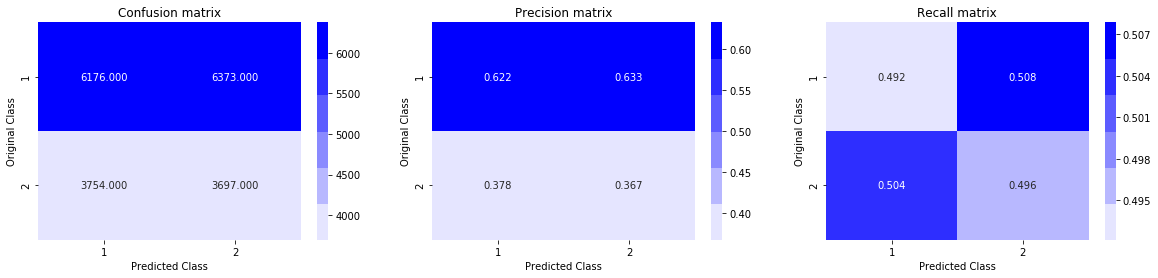

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

### Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.5122785366740716
For values of alpha =  0.0001 The log loss is: 0.5138446543654717
For values of alpha =  0.001 The log loss is: 0.5242688922957729
For values of alpha =  0.01 The log loss is: 0.5160512998933138
For values of alpha =  0.1 The log loss is: 0.5160503173962908
For values of alpha =  1 The log loss is: 0.5002981377384517
For values of alpha =  10 The log loss is: 0.513515646484234


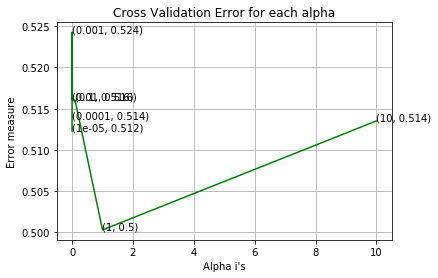

For values of best alpha =  1 The train log loss is: 0.49672963589730734
For values of best alpha =  1 The test log loss is: 0.5002981377384517
Total number of data points : 20000


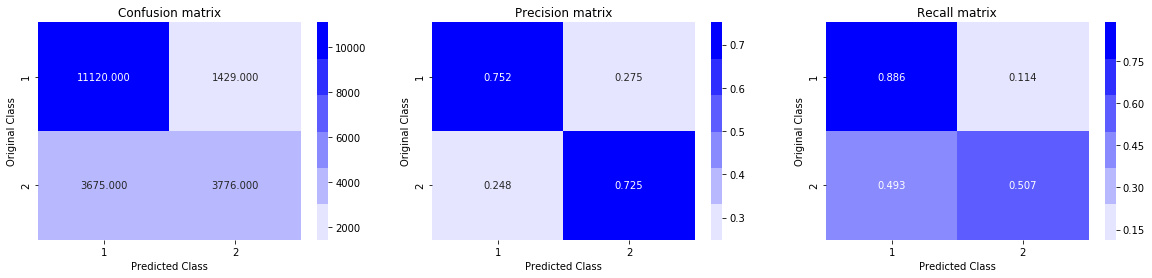

In [26]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.5802471570896839
For values of alpha =  0.0001 The log loss is: 0.4828094006631191
For values of alpha =  0.001 The log loss is: 0.516201285754687
For values of alpha =  0.01 The log loss is: 0.5678119444737264
For values of alpha =  0.1 The log loss is: 0.6060723428406178
For values of alpha =  1 The log loss is: 0.6366103451105977
For values of alpha =  10 The log loss is: 0.644078585611343


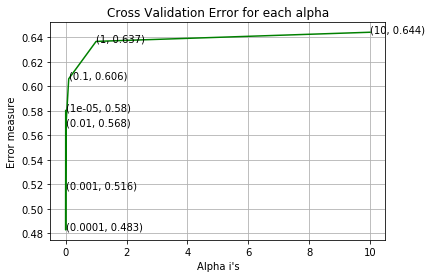

For values of best alpha =  0.0001 The train log loss is: 0.4777288603749968
For values of best alpha =  0.0001 The test log loss is: 0.4828094006631191
Total number of data points : 20000


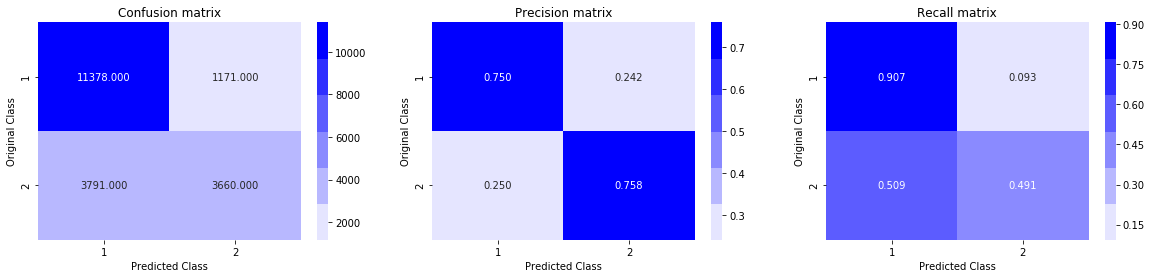

In [27]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### Hyper parameter tuning  for XGBOOST

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from xgboost  import  XGBClassifier

In [19]:
n_estimators=list(range(100,500,100))
learning_rate=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3]
max_depth=list(range(3,20,1))
gamma=[i/10.0 for i in range(0,5)]
min_child_weight =list(range(1,20,1))
subsample=[0.5,0.6,0.7,0.8,0.9,1.0]
colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1.0]
scale_pos_weight=list(range(0,5,1))
reg_alpha= [1e-5,1e-4,1e-3 ,1e-2, 0.1, 1, 100]

param_distributions  = dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,gamma=gamma,
                           min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight,reg_alpha=reg_alpha)
print(param_distributions)

# instantiate and fit the grid
grid = RandomizedSearchCV(XGBClassifier(), param_distributions, cv=3, scoring='neg_log_loss', return_train_score=False,n_jobs=-1)

{'n_estimators': [100, 200, 300, 400], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'scale_pos_weight': [0, 1, 2, 3, 4], 'reg_alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 100]}


In [20]:
grid.fit(X_train,y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

-0.34538638494778556
{'subsample': 0.7, 'scale_pos_weight': 2, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 16, 'max_depth': 17, 'learning_rate': 0.08, 'gamma': 0.3, 'colsample_bytree': 0.8}


### XGBOOST

In [24]:
import xgboost as xgb
params = {}
params['n_estimators'] = 100
params['min_child_weight'] = 16
params['subsample'] = 0.7
params['colsample_bytree'] = 0.8
params['gamma'] = 0.3
params['reg_alpha'] = 0.01
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 17

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[09:14:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 10 pruned nodes, max_depth=17
[0]	train-logloss:0.687795	valid-logloss:0.68818
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[09:14:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 6 pruned nodes, max_depth=17
[09:14:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 6 pruned nodes, max_depth=17
[09:14:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes, 8 pruned nodes, max_depth=17
[09:14:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 4 pruned nodes, max_depth=17
[09:14:59] C:\Users\Administrator\

[09:22:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 14 pruned nodes, max_depth=17
[09:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 788 extra nodes, 8 pruned nodes, max_depth=17
[09:22:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 6 pruned nodes, max_depth=17
[09:22:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 748 extra nodes, 14 pruned nodes, max_depth=17
[09:22:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 780 extra nodes, 6 pruned nodes, max_depth=17
[09:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 766 extra nodes, 14 pruned nodes, max_depth=17
[09:23:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74:

[09:30:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 692 extra nodes, 12 pruned nodes, max_depth=17
[09:30:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 742 extra nodes, 10 pruned nodes, max_depth=17
[09:31:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 762 extra nodes, 4 pruned nodes, max_depth=17
[09:31:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 768 extra nodes, 6 pruned nodes, max_depth=17
[09:31:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 764 extra nodes, 8 pruned nodes, max_depth=17
[09:31:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 670 extra nodes, 10 pruned nodes, max_depth=17
[09:31:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74:

[09:39:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 708 extra nodes, 2 pruned nodes, max_depth=17
[09:39:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 6 pruned nodes, max_depth=17
[09:39:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 2 pruned nodes, max_depth=17
[09:39:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 694 extra nodes, 14 pruned nodes, max_depth=17
[09:39:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 728 extra nodes, 10 pruned nodes, max_depth=17
[09:39:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 6 pruned nodes, max_depth=17
[160]	train-logloss:0.336106	valid-logloss:0.388228
[09:40:08] C:\Users\Administ

[09:47:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 6 pruned nodes, max_depth=17
[09:47:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 686 extra nodes, 2 pruned nodes, max_depth=17
[09:48:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 2 pruned nodes, max_depth=17
[09:48:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 2 pruned nodes, max_depth=17
[210]	train-logloss:0.298188	valid-logloss:0.363927
[09:48:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 6 pruned nodes, max_depth=17
[09:48:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 658 extra nodes, 2 pruned nodes, max_depth=17
[09:48:42] C:\Users\Administra

[09:56:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 2 pruned nodes, max_depth=17
[09:56:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 0 pruned nodes, max_depth=17
[260]	train-logloss:0.270468	valid-logloss:0.348863
[09:56:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 6 pruned nodes, max_depth=17
[09:56:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 0 pruned nodes, max_depth=17
[09:56:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 6 pruned nodes, max_depth=17
[09:57:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 2 pruned nodes, max_depth=17
[09:57:18] C:\Users\Administra

[10:04:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 2 pruned nodes, max_depth=17
[10:05:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 2 pruned nodes, max_depth=17
[10:05:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 0 pruned nodes, max_depth=17
[10:05:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 2 pruned nodes, max_depth=17
[10:05:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 558 extra nodes, 4 pruned nodes, max_depth=17
[10:05:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 570 extra nodes, 6 pruned nodes, max_depth=17
[10:06:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tr

[10:13:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 0 pruned nodes, max_depth=17
[10:13:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 554 extra nodes, 0 pruned nodes, max_depth=17
[10:14:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 2 pruned nodes, max_depth=17
[10:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 2 pruned nodes, max_depth=17
[10:14:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 510 extra nodes, 0 pruned nodes, max_depth=17
[10:14:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 2 pruned nodes, max_depth=17
[10:14:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tr

Total number of data points : 20000


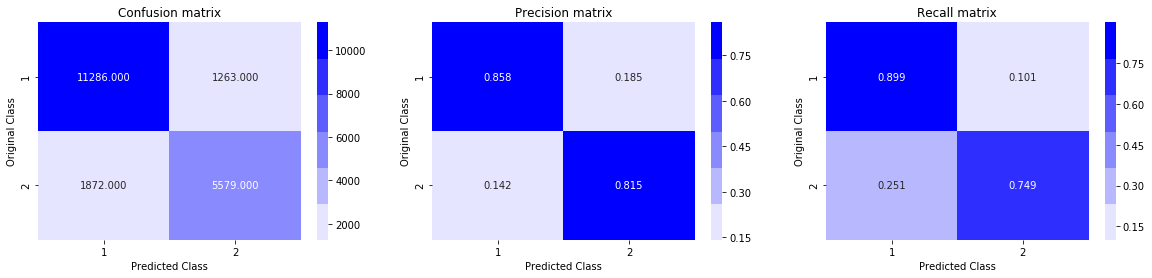

In [25]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### Importing Simple Tf-idf features file 
##### Lets try Logistic regression and Linear SVM on it

In [28]:
from scipy import sparse
final_features_tfidf = sparse.load_npz("final_features_tfidf.npz")

In [29]:
final_features_tfidf

<100000x163096 sparse matrix of type '<class 'numpy.float64'>'
	with 4505604 stored elements in Compressed Sparse Row format>

In [30]:
y_true=pd.read_csv('y_true.csv',header=None)
y_true=pd.DataFrame(y_true)

In [35]:
y_true.head(5)

,0,1
0,121958,1
1,146867,0
2,131932,1
3,365838,1
4,259178,0


In [31]:
y_true.drop([0],axis=1,inplace=True)

In [38]:
y_true.head(5)

,1
0,1
1,0
2,1
3,1
4,0


In [32]:
X_train,X_test, y_train, y_test = train_test_split(final_features_tfidf, y_true, stratify=y_true, test_size=0.2)

<h2>  Logistic Regression with hyperparameter tuning </h2>

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  1e-05 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.0001 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.001 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.01 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.1 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  1 The log loss is: 0.6449071484847831


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  10 The log loss is: 0.6592212539965192


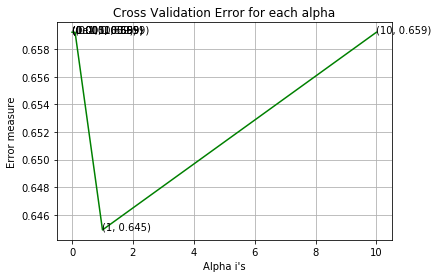

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of best alpha =  1 The train log loss is: 0.6448625946071465
For values of best alpha =  1 The test log loss is: 0.6449071484847831
Total number of data points : 20000


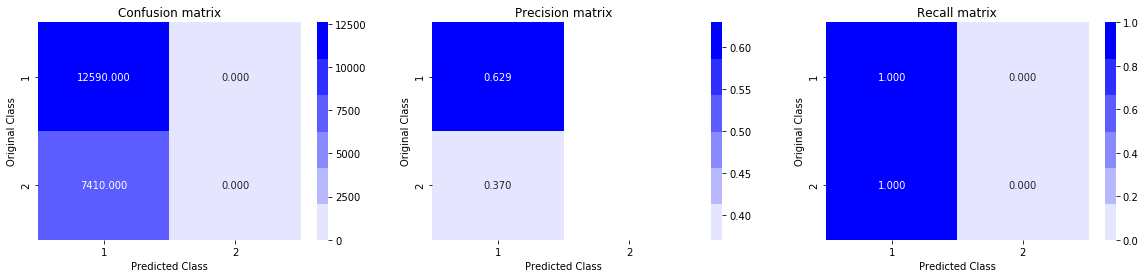

In [34]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2>  Linear SVM with hyperparameter tuning </h2>

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  1e-05 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.0001 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.001 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.01 The log loss is: 0.6592212539965192


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  0.1 The log loss is: 0.6208236826777829


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  1 The log loss is: 0.6368395560836245


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of alpha =  10 The log loss is: 0.6592212539965192


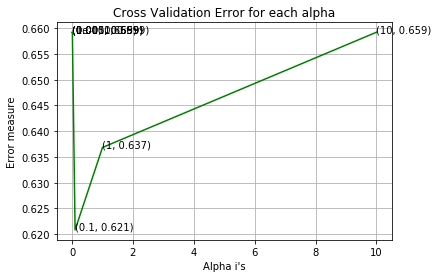

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For values of best alpha =  0.1 The train log loss is: 0.6196195882146978
For values of best alpha =  0.1 The test log loss is: 0.6208236826777829
Total number of data points : 20000


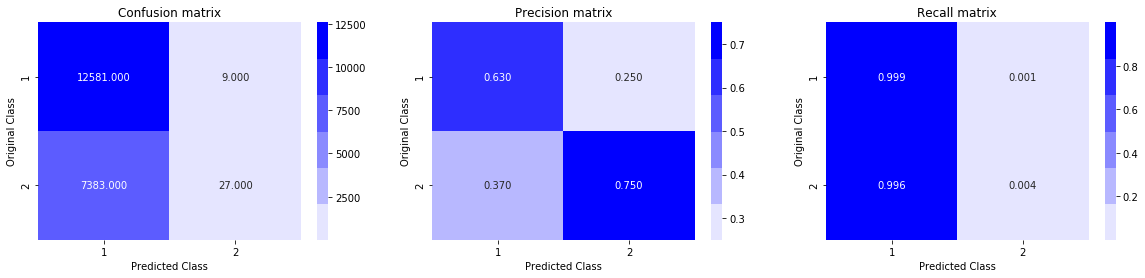

In [33]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

#### Summary 

In [35]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names = ["Model","Featurization", "Train log-loss", "Test log-loss"]
x.add_row(["Logistic Regression","TFIDF-W2V",0.4967,0.5002])
x.add_row(["Linear SVM","TFIDF-W2V",0.4777,0.4828])
x.add_row(["XGboost","TFIDF-W2V",0.2200,0.3282])
x.add_row(["Logistic Regression","TFIDF",0.6448,0.6449])
x.add_row(["Linear SVM","TFIDF",0.6196,0.6208])

print(x)

+---------------------+---------------+----------------+---------------+
|        Model        | Featurization | Train log-loss | Test log-loss |
+---------------------+---------------+----------------+---------------+
| Logistic Regression |   TFIDF-W2V   |     0.4967     |     0.5002    |
|      Linear SVM     |   TFIDF-W2V   |     0.4777     |     0.4828    |
|       XGboost       |   TFIDF-W2V   |      0.22      |     0.3282    |
| Logistic Regression |     TFIDF     |     0.6448     |     0.6449    |
|      Linear SVM     |     TFIDF     |     0.6196     |     0.6208    |
+---------------------+---------------+----------------+---------------+
